# 목차
+ train_test_split
+ 교차검증
    + KFold
    + Stratified KFold
    + cross_val_score()
    + GridSearchCV
+ 데이터 전처리
    + 레이블 인코딩
    + 원핫 인코딩
    + 피처 스케일링과 정규화
        + StandardScaler
        + MinMaxScaler
+ 평가
    + 정확도 (accuracy)
    + 오차 행렬
    + 정밀도와 재현율
    + F1 스코어
    + ROC 곡선과 AUC
    + 피마 인디언 당뇨병 예측
+ 분류
    + 결정 트리 모델의 시각화
    + feature 별 중요도
    + 결정 트리 과적합
    + 결정 트리 실습 - 사용자 행동 인식 데이터 세트
    + 앙상블 학습
    + 랜덤 포레스트
    + GBM (Gradient Boosting Machine)
    + XGBoost (eXtra Gradient Boost)
        + python wrapper XGBoost
        + sklearn wrapper XGBoost
    + LightGBM
    + 분류 실습
        + 캐글 산탄데르 고객 만족 예측
        + 캐글 신용카드 사기 검출

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [ ]:
keys = iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### 1. 학습 / 테스트 데이터 세트 분리 - train_test_split()

##### 아래와 같이 train_data 와 test_data 를 나누지 않으면 정확도를 예측할 수 없다.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
df_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
df_clf.fit(train_data, train_label)

pred = df_clf.predict(train_data) # 위와 같이 train_data 와 test_data 를 나누지 않으면 정확도를 예측할 수 없다..predict(train_data)
print("예측 정확도:", accuracy_score(train_label, pred))

예측 정확도: 1.0


In [ ]:
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state=1)

df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print("예측 정확도:", accuracy_score(y_test, pred))

예측 정확도: 0.9555555555555556


#### 2. 교차검증

#### - KFold

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5 개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print("붓꽃 데이터 세트 크기:", features.shape[0])

붓꽃 데이터 세트 크기: 150


In [ ]:
n_iter = 0

# KFold 객체의 split() 를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array 로 변환.
for train_index, test_index in kfold.split(features):
    #kfold.split() 으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred, 4))
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print("\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}".format(n_iter, accuracy, train_size, test_size))
    print("#{0} 검증 세트 인덱스:{1}".format(n_iter, test_index))
    cv_accuracy.append(accuracy)
          
# 개별 iteration 별 정확도를 합하여 평균 정확도 계산
print("\n## 평균 검증 정확도:", np.mean(cv_accuracy))


1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 1.0


c:\users\k58m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass normalize=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\k58m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass normalize=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\k58m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass normalize=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\k58m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: 

#### - Stratified KFold

In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df["label"].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

#### 아래처럼 정렬된 데이터를 고르게 분포하지 않고 학습을 하게 된다면 절대 결과를 예측하지 못한다.

In [ ]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]
    print("## 교차검증: {0}".format(n_iter))
    print("학습 레이블 데이터 분포:\n", label_train.value_counts())
    print("검증 레이블 데이터 분포:\n", label_test.value_counts(), "\n\n")
    
    

## 교차검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64 


## 교차검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64 


## 교차검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64 




#### StraitifiedKFold 는 위와 같은 현상을 해결해준다.

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df["label"]):
    n_iter += 1
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("## 교차검증: {0}".format(n_iter))
    print("학습 레이블 데이터 분포: \n", label_train.value_counts())
    print("검증 레이블 데이터 분포: \n", label_train.value_counts())

## 교차검증: 1
학습 레이블 데이터 분포: 
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    34
1    33
0    33
Name: label, dtype: int64
## 교차검증: 2
학습 레이블 데이터 분포: 
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    34
2    33
0    33
Name: label, dtype: int64
## 교차검증: 3
학습 레이블 데이터 분포: 
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    34
2    33
1    33
Name: label, dtype: int64


In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

print(features[0:5])
print(label[0:5])

# StratifiedKFold 의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split() 으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print("\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}"
             .format(n_iter, accuracy, train_size, test_size))
    print("\n{0} 검증 세트 인덱스: {1}".format(n_iter, test_index))
    print("\n{0} 검증 세트 데이터: {1}".format(n_iter, X_train))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print("\n## 교차 검증별 정확도:", np.round(cv_accuracy, 4))
print("## 평균 검증 정확도:", np.mean(cv_accuracy))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]

1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

1 검증 세트 데이터: [[5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [

#### - 교차 검증을 보다 간편하게 - cross_val_score()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring="accuracy", cv=3)
print("교차 검증별 정확도:", np.round(scores, 4))
print("평균 검증 정확도:", np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


#### 3. GridSearechCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

In [ ]:
import pandas as pd

# param_grid 의 하이퍼 파라미터를 3개의 train, test set fold 로 나누어 테스트 수행 설정.
# refit=True 가 default임. True 이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid 의 하이퍼 파라미터를 순차적으로 학습/ 평가.
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame 으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score", "split2_test_score"]]
# 아래 코드는 1위의 성능을 보인 하이퍼파라미터의 데이터프레임을 보여주는 코드이다.
# scores_df[scores_df.rank_test_score == 1][["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score", "split2_test_score"]]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [ ]:
print("GridSearchCV 최적 파라미터:", grid_dtree.best_params_)
print("GridSearchCV 최고 정확도:{0:.4f}".format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [ ]:
# GridSearchCV 의 refit 으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV 의 best_estimator_ 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print("테스트 데이터 세트 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


### 4. 데이터 전처리

#### - 레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "믹서", "믹서"]

# LabelEncoder 를 객체로 생성한 후, fit() 과 transform() 으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print("인코딩 변환값:", labels)

인코딩 변환값: [0 1 4 5 3 2 2]


In [ ]:
print("인코딩 클래스:", encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [ ]:
print("디코딩 원본값:", encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기']


#### - 원-핫 인코딩 (One-Hot Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

# 먼저 숫자 값으로 변환을 위해 LabelEncoder 로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 반환합니다.
labels = labels.reshape(-1, 1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print("원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [ ]:
import pandas as pd

df = pd.DataFrame({'item': ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### - 피처 스케일링과 정규화

### - StandardScaler

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame 으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print("feature 들의 평균값")
print(iris_df.mean())
print("\nfeature 들의 분산 값")
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환, fit() 과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)  # NumPy ndarray 로 반환됨

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names) # 데이터 프레임으로 변환
print("feature 들의 평균값")
print(iris_df_scaled.mean())
print("\nfeature 들의 분산 값")
print(iris_df_scaled.var())

feature 들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### - MinMacScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 세트 변환, fit() 과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)  # ndarray 로 반환됨.

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)  # DataFrame 으로 변환.
print("feature 들의 최솟값")
print(iris_df_scaled.min())
print("\nfeature 들의 최댓값")
print(iris_df_scaled.max())

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### - 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- 학습 데이터 세트로 Scaler 객체의 fit() 과 transform() 를 적용하면 테스트 데이터 세트도 학습 데이터 세트로 fit 한 상태로 transform 을 해야 한다.

- 모듈 임포드 & 변수 선언

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

 # Scaler 객체의 fit() 과 transform() 메소드는 이차원 이상 데이터만 가능하므로 reshape 을 해준다.
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

- 잘못된 예시

In [ ]:
scaler = MinMaxScaler()

scaler.fit(train_array)

train_scaled = scaler.transform(train_array)

print("train_scaled:", np.round(train_scaled.reshape(-1), 2))

# 아래처럼 테스트 데이터 세트로 또 fit 하면 안됨.
scaler.fit(test_array)

test_scaled = scaler.transform(test_array)

print("test_scaled:", np.round(test_scaled.reshape(-1), 2))

train_scaled: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
test_scaled: [0.  0.2 0.4 0.6 0.8 1. ]


- 올바른 예시

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

test_scaled = scaler.transform(test_array)

print("train_scaled:", np.round(train_scaled.reshape(-1), 2))
print("test_scaled:", np.round(test_scaled.reshape(-1), 2))

train_scaled: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
test_scaled: [0.  0.1 0.2 0.3 0.4 0.5]


### 5. 평가
- 정확도 (accuracy)
- 오차 행렬
- 정밀도와 재현율
- F1 스코어
- ROC 곡선과 AUC

In [ ]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):  # 학습을 하지 않음.
        pass
    def predict(self, X):  # 특정 알고리즘으로도 정확도가 높게 나옴.
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X["Sex"].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def sex_to_num(x):
    if x == "male": return 1
    if x == "female": return 0

titanic_df = pd.read_csv("./titanic_survivor_prediction/titanic_train.csv")
titanic_df["Sex"] = titanic_df["Sex"].apply(lambda x : sex_to_num(x))
y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop("Survived", axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
mypredictions = myclf.predict(X_test)
print("단순 알고리즘만으로 나온 정확도:", np.round(accuracy_score(y_test, mypredictions), 4))

단순 알고리즘만으로 나온 정확도: 0.7877


### - 불균형한 데이터셋을 사용하면 생기는 일

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(selx, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()
# 7 만 True 로 하고, 나머지는 다 False 로 하여 불균형한 데이터셋으로 만든다.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

print("label testset shape:", y_test.shape)
print("testset label 0 and 1 distribution\n", pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakepred = fakeclf.predict(X_test)
# 불균형한 데이터셋으로는 단순 알고리즘만으로도 높은 정확도를 만들어 낼 수 있다.
print("accuracy score is:", np.round(accuracy_score(y_test, fakepred), 4))

label testset shape: (450,)
testset label 0 and 1 distribution
 0    405
1     45
dtype: int64
accuracy score is: 0.9


### - 오차행렬

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)
# TN - [0, 0], FP - [0, 1], FN - [1, 0], TP - [1, 1]

array([[405,   0],
       [ 45,   0]], dtype=int64)

### - 정밀도와 재현율
- 정밀도 = TP / (FP + TP) -> Nagative 를 Postivie 로 잘못 판단하는지가 중요할 경우 사용됨.  
예) 스팸이 아닌데 스팸메일로 착각하여 필터로 걸러서 메일을 보내지 않는 경우.  
- 재현율 = TP / (FN + TP) -> Positive 를 Nagative 로 잘못 판단하는지가 중요할 경우 사용됨.  
예) 암인데 암이 아니라고 착각하는 치명적인 실수를 하는 경우.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)  # 정확도
    precision = precision_score(y_test, pred)  # 정밀도
    recall = recall_score(y_test, pred)  # 재현율
    print(confusion)
    print(f"accuracy(정확도): {accuracy}, precision(정밀도): {precision}, recall(재현율): {recall}")

In [31]:
from sklearn import preprocessing

# Null 처리
def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 정의한 메소드 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv("./titanic_survivor_prediction/titanic_train.csv")
y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop("Survived", axis=1)
x_titanic_df = transform_features(x_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[104  14]
 [ 13  48]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.7741935483870968, recall(재현율): 0.7868852459016393


### - 정밀도 / 재현율 트레이드오프

In [33]:
pred_proba = lr_clf.predict_proba(X_test)  # 레이블별 예측률을 반환함.
pred = lr_clf.predict(X_test)
print("pred_prob shape:", pred_proba.shape)
print("pred_proba ex 3 :\n", pred_proba[:3])
# [[0.46175211 0.53824789]]  -> 레이블이 0일 확률 약 46%, 1일 확률 약 53%
# predict 는 predict_proba 를 통해 반환됨.

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print("두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측:\n", pred_proba_result[:3])

pred_prob shape: (179, 2)
pred_proba ex 3 :
 [[0.46175211 0.53824789]
 [0.87863924 0.12136076]
 [0.87717092 0.12282908]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측:
 [[0.46175211 0.53824789 1.        ]
 [0.87863924 0.12136076 0.        ]
 [0.87717092 0.12282908 0.        ]]


In [34]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5  # 임계값

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)  # Index1 번째 값을 가져와 임계값으로 레이블 결정.

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[104  14]
 [ 13  48]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.7741935483870968, recall(재현율): 0.7868852459016393


In [35]:
custom_threshold = 0.4  # 임계값

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[98 20]
 [10 51]]
accuracy(정확도): 0.8324022346368715, precision(정밀도): 0.7183098591549296, recall(재현율): 0.8360655737704918


In [36]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

# 임계값별로 정확도, 정밀도, 재현율을 구함
def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
[[98 20]
 [10 51]]
accuracy(정확도): 0.8324022346368715, precision(정밀도): 0.7183098591549296, recall(재현율): 0.8360655737704918
임곗값: 0.45
[[103  15]
 [ 12  49]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.765625, recall(재현율): 0.8032786885245902
임곗값: 0.5
[[104  14]
 [ 13  48]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.7741935483870968, recall(재현율): 0.7868852459016393
임곗값: 0.55
[[109   9]
 [ 15  46]]
accuracy(정확도): 0.8659217877094972, precision(정밀도): 0.8363636363636363, recall(재현율): 0.7540983606557377
임곗값: 0.6
[[112   6]
 [ 16  45]]
accuracy(정확도): 0.8770949720670391, precision(정밀도): 0.8823529411764706, recall(재현율): 0.7377049180327869


In [37]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("thresholds shape:", thresholds.shape)

thre_index = np.arange(0, thresholds.shape[0], 15)  # 15 단계씩 정밀도, 재현율을 구함

print("thresholds:", np.round(thresholds[thre_index], 2))
print("precisions:", np.round(precisions[thre_index], 2))
print("recalls:   ", np.round(recalls[thre_index], 2))

thresholds shape: (143,)
thresholds: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
precisions: [0.39 0.44 0.47 0.54 0.65 0.73 0.84 0.95 0.96 1.  ]
recalls:    [1.   0.97 0.9  0.9  0.9  0.84 0.75 0.61 0.38 0.15]


In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

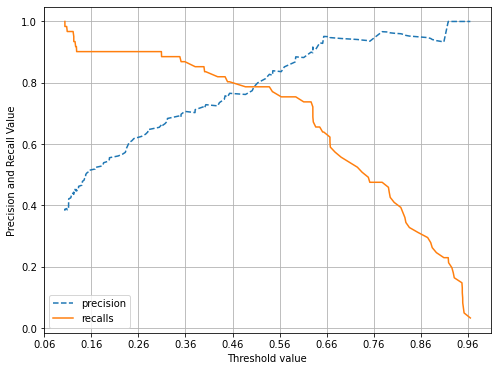

In [39]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로 표현
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle="--", label="precision")
    # 재현율은 실선으로 표현
    plt.plot(thresholds, recalls[:threshold_boundary], label="recalls")
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall Value")
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])
# 아래 그래프에서 교점에 해당하는 x 값이 가장 적절한 임계값임.

### - F1 스코어
- F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우지지 ㅇ낳는 수치를 나타낼 때 상대적으로 높은 값을 가짐.

In [42]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print("F1 score :", f1)

F1 score : 0.7804878048780488


In [43]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)  # 정확도
    precision = precision_score(y_test, pred)  # 정밀도
    recall = recall_score(y_test, pred)  # 재현율
    f1 = f1_score(y_test, pred)  # F1 스코어
    print(confusion)
    print(f"accuracy(정확도): {accuracy}, precision(정밀도): {precision}\n",
          f"recall(재현율): {recall}, f1 score: {f1}\n\n")
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
[[98 20]
 [10 51]]
accuracy(정확도): 0.8324022346368715, precision(정밀도): 0.7183098591549296
 recall(재현율): 0.8360655737704918, f1 score: 0.7727272727272727


임곗값: 0.45
[[103  15]
 [ 12  49]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.765625
 recall(재현율): 0.8032786885245902, f1 score: 0.784


임곗값: 0.5
[[104  14]
 [ 13  48]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.7741935483870968
 recall(재현율): 0.7868852459016393, f1 score: 0.7804878048780488


임곗값: 0.55
[[109   9]
 [ 15  46]]
accuracy(정확도): 0.8659217877094972, precision(정밀도): 0.8363636363636363
 recall(재현율): 0.7540983606557377, f1 score: 0.793103448275862


임곗값: 0.6
[[112   6]
 [ 16  45]]
accuracy(정확도): 0.8770949720670391, precision(정밀도): 0.8823529411764706
 recall(재현율): 0.7377049180327869, f1 score: 0.8035714285714285




### - ROC 곡선과 AUC
- 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다.
- 사용되는 용어 : FPR(False Positive Rate), TPR(True Positive Rate), TNR(True Nagative Rate)
- TPR 은 재현율, 민감도라고도 불린다.
- TNR 은 특이성이다.
- 민감도는(TPR) 실제값 Positive 가 정확히 예측돼야 하는 수준을 나타낸다.
- 특이성은(TNR) 실제값 Negative 가 정확히 예측돼야 하는 수준을 나타낸다.

In [44]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]  # 라벨별 예측확률의 1번째 인덱스값을 가져옴

# roc_curve 모듈을 사용하여 FPR, TPR, 임계값을 반환받음.
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)
print("index of thresholds array:", thr_index)
print("threshold for sample index:", np.round(thresholds[thr_index], 2))  # 임계값

print("FPR by sample threshold:", np.round(fprs[thr_index], 3))  # 임계값별 FPR
print("TPR by sample threshold:", np.round(tprs[thr_index], 3))  # 임계값별 TPR

index of thresholds array: [ 1  6 11 16 21 26 31 36 41 46 51]
threshold for sample index: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
FPR by sample threshold: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
TPR by sample threshold: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


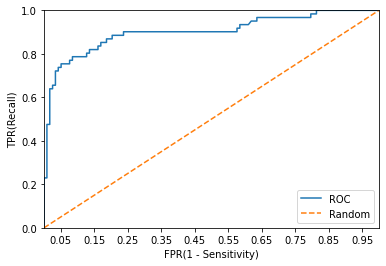

In [45]:
def roc_curve_plot(y_test, pred_proba_1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_1)
    plt.plot(fprs, tprs, label="ROC")  # FPR(X) 의 값에 대한 TPR(Y) 의 값을 그래프로 그림. 
    plt.plot([0,1], [0,1], '--', label="Random")  # 가운데를 지나는 곡선.
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("FPR(1 - Sensitivity)")
    plt.ylabel("TPR(Recall)")
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

### - AUC 값 구하기
- AUC 값이 1에 가까울수록 좋은 것이다.

In [46]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print("ROC AUC value:", roc_score)

ROC AUC value: 0.9024034454015005


In [43]:
def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)  # 정확도
    precision = precision_score(y_test, pred)  # 정밀도
    recall = recall_score(y_test, pred)  # 재현율
    f1 = f1_score(y_test, pred)  # F1 스코어
    if pred_proba is not None: roc_auc = roc_auc_score(y_test, pred_proba)  # AUC 스코어
    else: roc_auc = "pred_proba is None"
    print(confusion)
    print(f"accuracy(정확도): {accuracy}, precision(정밀도): {precision}\n",
          f"recall(재현율): {recall}, f1 score: {f1}, roc_auc value: {roc_auc}\n\n")

### - 피마 인디언 당뇨병 예측

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("./pima_indian_diabetes_datasets/diabetes.csv")
print(diabetes_data["Outcome"].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, 
                                                    stratify=y)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)
pred_proba = lr_model.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

[[90 10]
 [21 33]]
accuracy(정확도): 0.7987012987012987, precision(정밀도): 0.7674418604651163
 recall(재현율): 0.6111111111111112, f1 score: 0.6804123711340206, roc_auc value: 0.807037037037037




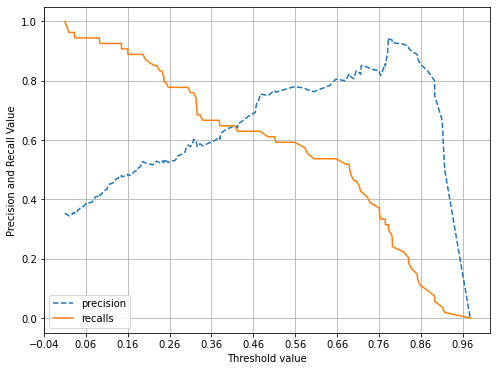

In [ ]:
pred_proba_1 = lr_model.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_1)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

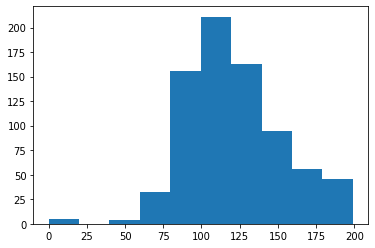

In [ ]:
plt.hist(diabetes_data["Glucose"], bins=10)  # 포도당 수치 히스토그램

In [ ]:
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

total_count = diabetes_data["Glucose"].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f"{feature} 컬럼에서 0인 개수: {zero_count}, 퍼센트: {100*zero_count/total_count}")

Glucose 컬럼에서 0인 개수: 5, 퍼센트: 0.6510416666666666
BloodPressure 컬럼에서 0인 개수: 35, 퍼센트: 4.557291666666667
SkinThickness 컬럼에서 0인 개수: 227, 퍼센트: 29.557291666666668
Insulin 컬럼에서 0인 개수: 374, 퍼센트: 48.697916666666664
BMI 컬럼에서 0인 개수: 11, 퍼센트: 1.4322916666666667


In [ ]:
mean_zero_features = diabetes_data[zero_features].mean()  # 0 을 각 컬럼의 평균값으로 대체.
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [ ]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156,
                                                   stratify=y)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)
pred_proba = lr_model.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)
# 재현율이 상대적으로 낮음

[[90 10]
 [21 33]]
accuracy(정확도): 0.7987012987012987, precision(정밀도): 0.7674418604651163
 recall(재현율): 0.6111111111111112, f1 score: 0.6804123711340206, roc_auc value: 0.8453703703703703




In [ ]:
thresholds = [0.3, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_model.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)
# 임계값을 바꿔가며 가장 적절한 임계값을 찾음. -> 0.48 이 제일 적합한 임계값임

임곗값: 0.3
[[67 33]
 [11 43]]
accuracy(정확도): 0.7142857142857143, precision(정밀도): 0.5657894736842105
 recall(재현율): 0.7962962962962963, f1 score: 0.6615384615384615, roc_auc value: pred_proba is None


임곗값: 0.36
[[76 24]
 [15 39]]
accuracy(정확도): 0.7467532467532467, precision(정밀도): 0.6190476190476191
 recall(재현율): 0.7222222222222222, f1 score: 0.6666666666666666, roc_auc value: pred_proba is None


임곗값: 0.39
[[79 21]
 [16 38]]
accuracy(정확도): 0.7597402597402597, precision(정밀도): 0.6440677966101694
 recall(재현율): 0.7037037037037037, f1 score: 0.6725663716814159, roc_auc value: pred_proba is None


임곗값: 0.42
[[84 16]
 [18 36]]
accuracy(정확도): 0.7792207792207793, precision(정밀도): 0.6923076923076923
 recall(재현율): 0.6666666666666666, f1 score: 0.6792452830188679, roc_auc value: pred_proba is None


임곗값: 0.45
[[85 15]
 [18 36]]
accuracy(정확도): 0.7857142857142857, precision(정밀도): 0.7058823529411765
 recall(재현율): 0.6666666666666666, f1 score: 0.6857142857142857, roc_auc value: pred_proba is None


임곗값: 0

In [ ]:
# 임계값을 0.48 로 하여 예측한 결과
binarizer = Binarizer(threshold=0.48)

pred048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred048, pred_proba[:, 1])

[[89 11]
 [19 35]]
accuracy(정확도): 0.8051948051948052, precision(정밀도): 0.7608695652173914
 recall(재현율): 0.6481481481481481, f1 score: 0.7000000000000001, roc_auc value: 0.8453703703703703




### 5. 분류

### - 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

dt_model = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(dt_model, out_file="./tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

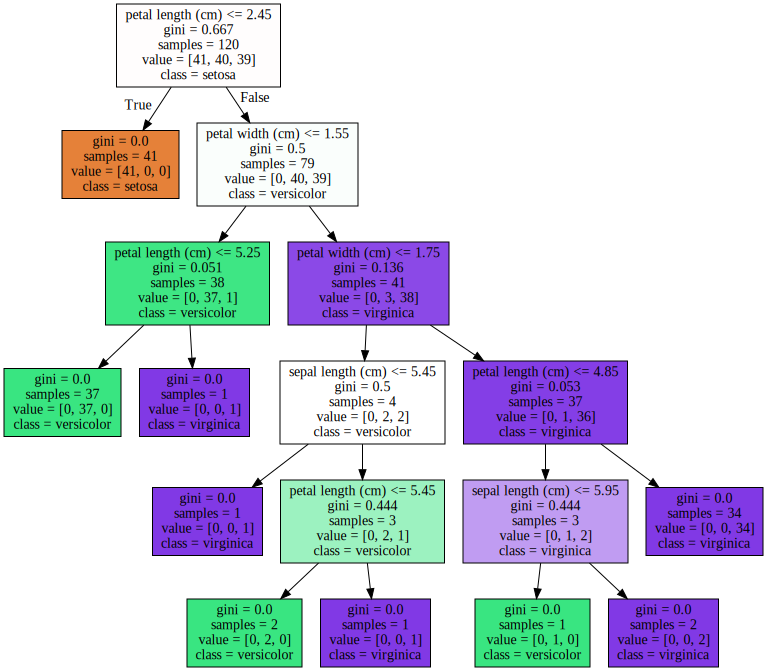

In [4]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

### - feature 별 중요도

Feature importances:
 [0.025 0.    0.555 0.42 ]
sepal length (cm) 0.025
sepal width (cm) 0.0
petal length (cm) 0.555
petal width (cm) 0.42


<AxesSubplot:>

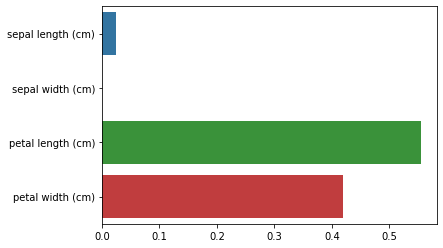

In [14]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n", np.round(dt_model.feature_importances_, 3))

for name, value in zip(iris_data.feature_names, dt_model.feature_importances_):
    print(name, np.round(value, 3))

sns.barplot(x=dt_model.feature_importances_, y=iris_data.feature_names)

### - 결정 트리 과적합 (Overfitting)

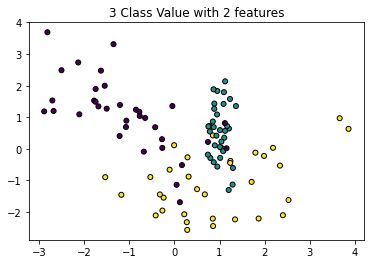

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class Value with 2 features")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, 
                                           random_state=0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker="o", c=y_labels, s=25, edgecolor="k")

In [17]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

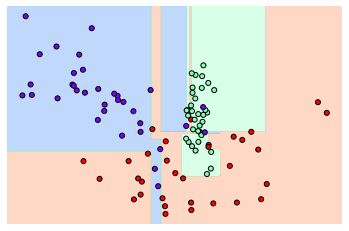

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_model, X_features, y_labels)

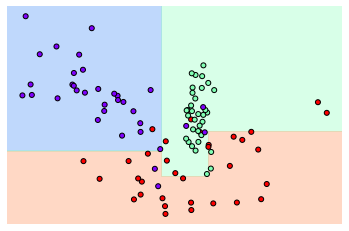

In [21]:
dt_model = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_model, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv("./human_activity/features.txt", sep="\s+",
                             header=None, names=["column_index", "column_name"])

feature_name = feature_name_df.iloc[:, 1].value_counts()
print(feature_name)

fBodyAccJerk-bandsEnergy()-41,48    3
fBodyAccJerk-bandsEnergy()-1,16     3
fBodyGyro-bandsEnergy()-33,40       3
fBodyAcc-bandsEnergy()-25,32        3
fBodyAccJerk-bandsEnergy()-17,24    3
                                   ..
fBodyAccMag-max()                   1
fBodyAccJerk-max()-X                1
tBodyGyroJerkMag-arCoeff()4         1
tBodyAcc-arCoeff()-X,3              1
fBodyAccJerk-std()-Z                1
Name: column_name, Length: 477, dtype: int64


In [2]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df["column_index"] > 1].count())
feature_dup_df[feature_dup_df["column_index"] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [1]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=["dup_cnt"])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df,
                                  how="outer")
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name", 'dup_cnt']].apply(
                                            lambda x : x[0]+'_'+str(x[1])
                                            if x[1] > 0 else x[0], axis=1)

    new_feature_name_df = new_feature_name_df.drop(["index"], axis=1)
    return new_feature_name_df

In [2]:
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv("./human_activity/features.txt", sep="\s+",
                                 header=None, names=["column_index", "column_name"])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv("./human_activity/train/X_train.txt", sep="\s+", names=feature_name)
    X_test = pd.read_csv("./human_activity/test/X_test.txt", sep="\s+", names=feature_name)
    
    y_train = pd.read_csv("./human_activity/train/y_train.txt", sep="\s+", header=None, names=["action"])
    y_test = pd.read_csv("./human_activity/test/y_test.txt", sep="\s+", header=None, names=["action"])
    
    y_train = y_train[:X_train.shape[0]]
    y_test = y_test[:X_test.shape[0]]
    
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)
    y_train = y_train.fillna(0)
    y_test = y_test.fillna(0)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 4.0 MB


In [28]:
y_train["action"].value_counts()

1    191
5    170
6    164
4    143
2    137
3    123
Name: action, dtype: int64

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=156)
dt_model.fit(X_train, y_train)

pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("DecisionTreeClassifier accuracy score is", accuracy)

print("DecisionTreeClassifier default hyper parameters:\n", dt_model.get_params())

DecisionTreeClassifier accuracy score is 0.7804878048780488
DecisionTreeClassifier default hyper parameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [32]:
from sklearn.model_selection import GridSearchCV
import numpy as np

params = {
    "max_depth": [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_model, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV most average accuracy is", np.round(grid_cv.best_score_, 4))
print("GridSearchCV best hyper parameter is", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV most average accuracy is 0.9169
GridSearchCV best hyper parameter is {'max_depth': 6}


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    5.4s finished


In [33]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

cv_result_df[["param_max_depth", "mean_test_score"]]

,param_max_depth,mean_test_score
0,6,0.916885
1,8,0.916885
2,10,0.916885
3,12,0.916885
4,16,0.916885
5,20,0.916885
6,24,0.916885


In [41]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
min_samples_leafs = [3, 4, 5, 6, 6, 6, 6]

for leaf, depth in zip(min_samples_leafs, max_depths):
    dt_model = DecisionTreeClassifier(min_samples_leaf=leaf, max_depth=depth, random_state=156)
    dt_model.fit(X_train, y_train)
    pred = dt_model.predict(X_test)
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    print(depth, accuracy)

6 0.7967
8 0.8016
10 0.7724
12 0.7854
16 0.7854
20 0.7854
24 0.7854


In [42]:
params = {
    "max_depth": [8, 12, 16, 20],
    "min_samples_split": [16, 24]
}

grid_cv = GridSearchCV(dt_model, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV most average accuracy score is", np.round(grid_cv.best_score_, 4))
print("GridSearchCV best hyper parameter is", grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV most average accuracy score is 0.9028
GridSearchCV best hyper parameter is {'max_depth': 8, 'min_samples_split': 16}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.7s finished


In [43]:
best_df_model = grid_cv.best_estimator_
pred1 = best_df_model.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred1), 4)
print("best_estimator accracy score is", accuracy)

best_estimator accracy score is 0.7854


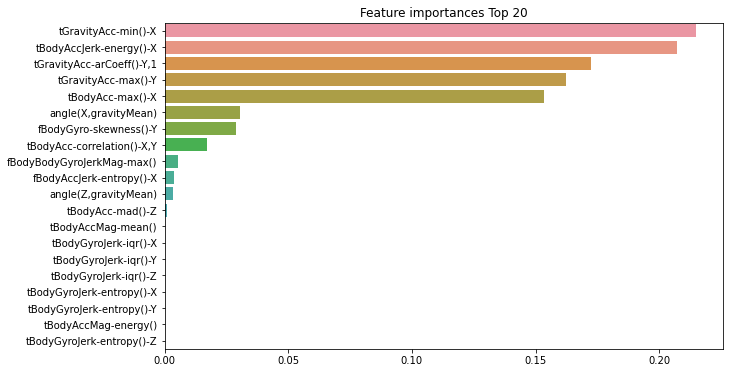

In [44]:
import seaborn as sns

ftr_importances_values = best_df_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### - 앙상블 학습
 - 여러 개의 classifier 를 생성하고, 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법

### - 보팅 분류기 (Voting Classifier)
- 각자 다른 분류기를 같은 데이터셋으로 학습하여 최종 예측결과를 도출해내는 '보팅' 방식이다.
- 다수결의 원칙으로 하는 하드보팅과, 예측확률을 기반으로 하는 소프트보팅이 있다. (소프트 보팅이 더 많이 쓰임.)

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
lr_model = LogisticRegression(solver='liblinear')
knn_model = KNeighborsClassifier(n_neighbors=8)

vo_model = VotingClassifier(estimators=[("LR", lr_model), ("KNN", knn_model)], voting="soft")

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2,
                                                   random_state=156)

vo_model.fit(X_train, y_train)
pred = vo_model.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred), 4)
print("Voting accuracy score is", accuracy)

Voting accuracy score is 0.9561


In [9]:
# 개별 모델의 학습/예측/평가
print("VotingClassifier accuracy score is", accuracy)
classifiers = [lr_model, knn_model]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    print(classifier, "accuracy score is", accuracy)

VotingClassifier accuracy score is 0.9561
LogisticRegression(solver='liblinear') accuracy score is 0.9474
KNeighborsClassifier(n_neighbors=8) accuracy score is 0.9386


### - 랜덤 포레스트
- 같은 분류기에 다른 데이터셋으로 학습하여 최종 예측결과를 도출해내는 '배깅' 방식이다.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = get_human_dataset()

rf_model = RandomForestClassifier(random_state=156)
rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred), 4)
print("random forest accuracy score is", accuracy)

random forest accuracy score is 0.8976


### - 랜덤 포레스트 하이퍼 파라미터

In [53]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators" : [100],
    "max_depth": [6, 8, 10, 12],
    "min_samples_leaf": [8, 12, 18],
    "min_samples_split": [8, 16, 20]
}

rf_model = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_model, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print("best hyper parameter:", grid_cv.best_params_)
print("best accuracy score:", np.round(grid_cv.best_score_, 4))

best hyper parameter: {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 100}
best accuracy score: 0.8599


In [55]:
rf_model1 = RandomForestClassifier(n_estimators=300, max_depth=6, min_samples_leaf=18,
                                  min_samples_split=8, random_state=0)
rf_model1.fit(X_train, y_train)
pred = rf_model1.predict(X_test)
print("accuracy score:", np.round(accuracy_score(y_test, pred), 4))

accuracy score: 0.8732


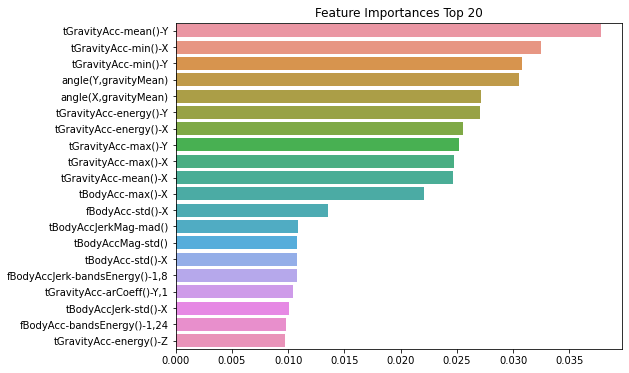

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_model1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### - GBM (Gradient Boosting Machine)
- 부스팅 알고리즘은 여러 개의 약한 학습기 (weak learner) 를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
import numpy as np
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = np.round(accuracy_score(y_test, gb_pred), 4)

print("GBM Execution time:", time.time() - start_time, "초")
print("GBM accuracy score:", gb_accuracy)

GBM Execution time: 169.78961396217346 초
GBM accuracy score: 0.8033


### - GBM 하이퍼 파라미터 튜닝

In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 500],
    "learning_rate": [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_model, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print("best hyper parameter:", grid_cv.best_params_)
print("best accuracy score:", np.round(grid_cv.best_score_, 4))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 30.9min finished


best hyper parameter: {'learning_rate': 0.05, 'n_estimators': 500}
best accuracy score: 0.7317


In [5]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = np.round(accuracy_score(y_test, gb_pred), 4)
print("GBM accuracy score:", gb_accuracy)

GBM accuracy score: 0.7724


### - XGBoost (eXtra Gradient Boost)
- python wrapper XGBoost 를 이용한 위스콘신 유방암 예측

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df["target"] = y_label
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [2]:
print(dataset.target_names)
print(cancer_df["target"].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [4]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [5]:
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'early_stoppings': 100
}
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, \
                     early_stopping_rounds=100, evals=wlist)

[19:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	test-logloss:0.61352
[1]	train-logloss:0.54080	test-logloss:0.54784
[2]	train-logloss:0.48375	test-logloss:0.49425
[3]	train-logloss:0.43446	test-logloss:0.44799
[4]	train-logloss:0.39055	test-logloss:0.40911
[5]	train-logloss:0.35414	test-logloss:0.37498
[6]	train-logloss:0.32122	test-logloss:0.34571
[7]	train-logloss:0.29259	test-logloss:0.32053
[8]	train-logloss:0.26747	test-logloss:0.29721
[9]	train-logloss:0.24515	test-logloss:0.27799
[10]	train-logloss:0.22569	test-logloss:0.26030
[11]	train-logloss:0.20794	test-logloss:0.24604
[12]	train-logloss:0.19218	test-logloss:0

[162]	train-logloss:0.00724	test-logloss:0.08776
[163]	train-logloss:0.00722	test-logloss:0.08778
[164]	train-logloss:0.00720	test-logloss:0.08778
[165]	train-logloss:0.00718	test-logloss:0.08752
[166]	train-logloss:0.00716	test-logloss:0.08754
[167]	train-logloss:0.00714	test-logloss:0.08764
[168]	train-logloss:0.00712	test-logloss:0.08739
[169]	train-logloss:0.00710	test-logloss:0.08738
[170]	train-logloss:0.00708	test-logloss:0.08730
[171]	train-logloss:0.00707	test-logloss:0.08737
[172]	train-logloss:0.00705	test-logloss:0.08740
[173]	train-logloss:0.00703	test-logloss:0.08739
[174]	train-logloss:0.00701	test-logloss:0.08713
[175]	train-logloss:0.00699	test-logloss:0.08716
[176]	train-logloss:0.00697	test-logloss:0.08696
[177]	train-logloss:0.00696	test-logloss:0.08705
[178]	train-logloss:0.00694	test-logloss:0.08697
[179]	train-logloss:0.00692	test-logloss:0.08697
[180]	train-logloss:0.00690	test-logloss:0.08704
[181]	train-logloss:0.00688	test-logloss:0.08680
[182]	train-logloss:

In [6]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3))

preds = np.array([1 if x > 0.1 else 0 for x in pred_probs])
print(preds[:10])

[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
[1 0 1 0 1 1 1 1 1 0]


In [12]:
get_clf_eval(y_test= np.array(y_test), pred= preds, pred_proba=pred_probs)
## 성능이 아주 뛰어남.

[[32  5]
 [ 0 77]]
accuracy(정확도): 0.956140350877193, precision(정밀도): 0.9390243902439024
 recall(재현율): 1.0, f1 score: 0.9685534591194969, roc_auc value: 0.995085995085995




<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

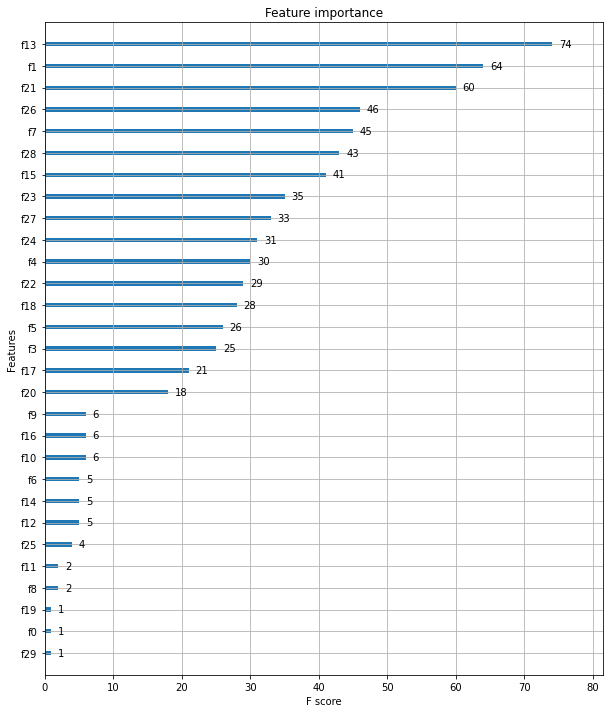

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
## f0 은 0 번째 feature, f1 은 1 번째 feature 를 의미함.

### - Sklearn wrapper XGBoost

In [14]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
xgb_preds = xgb_wrapper.predict(X_test)
xgb_pred_prob = xgb_wrapper.predict_proba(X_test)[:, 1]

[19:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
get_clf_eval(y_test, xgb_preds, xgb_pred_prob)
## 성능이 아주 좋게 나옴.

[[35  2]
 [ 1 76]]
accuracy(정확도): 0.9736842105263158, precision(정밀도): 0.9743589743589743
 recall(재현율): 0.987012987012987, f1 score: 0.9806451612903225, roc_auc value: 0.995085995085995




In [17]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]  # 실제로 바람직한 것은 아님. 테스트셋이 fit 할 때 영향이 있어서 과적합이 될 수도 있음.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
xgb_preds = xgb_wrapper.predict(X_test)
xgb_pred_prob = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [26]:
get_clf_eval(y_test, xgb_preds, xgb_pred_prob)

[[35  2]
 [ 1 76]]
accuracy(정확도): 0.9736842105263158, precision(정밀도): 0.9743589743589743
 recall(재현율): 0.987012987012987, f1 score: 0.9806451612903225, roc_auc value: 0.995085995085995




In [27]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)
xgb_preds = xgb_wrapper.predict(X_test)
xgb_pred_prob = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [29]:
get_clf_eval(y_test, xgb_preds, xgb_pred_prob)
## early_stopping_rounds 를 급격하게 줄이면 성능이 좋아지지 않을 수 있음.

[[34  3]
 [ 2 75]]
accuracy(정확도): 0.956140350877193, precision(정밀도): 0.9615384615384616
 recall(재현율): 0.974025974025974, f1 score: 0.967741935483871, roc_auc value: 0.9947349947349947




### - LightGBM
- XGBoost 보다 학습 시간이 훨씬 적게 걸린다.
+ 위스콘신 유방암 예측

In [2]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [5]:
get_clf_eval(y_test, preds, pred_proba)

[[33  4]
 [ 1 76]]
accuracy(정확도): 0.956140350877193, precision(정밀도): 0.95
 recall(재현율): 0.987012987012987, f1 score: 0.9681528662420381, roc_auc value: 0.9905229905229904




<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

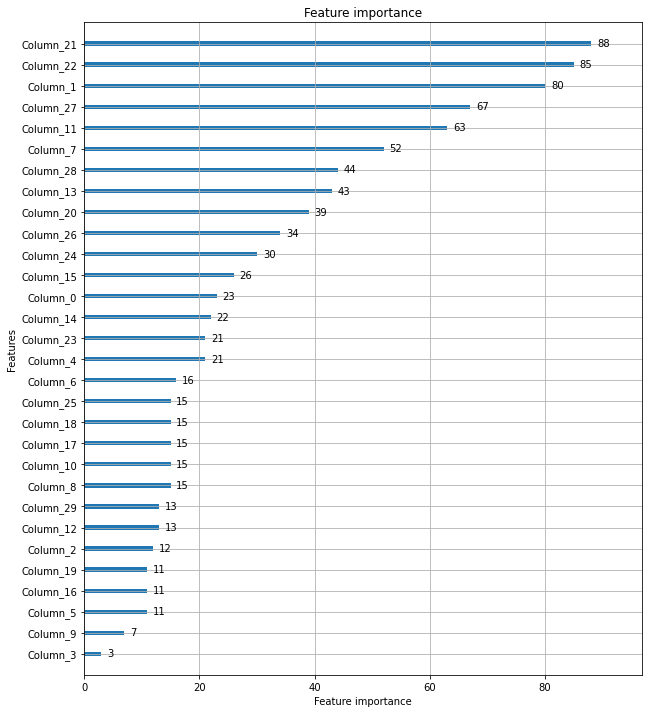

In [6]:
from lightgbm import plot_importance

import matplotlib.pyplot as plt
%matplotlib inline

fix, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

### 분류 실습
+ 캐글 산탄데르 고객 만족 예측
    - 데이터 셋 : https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv
+ 캐글 신용카드 사기 검출

### 캐글 산탄데르 고객 만족 예측

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cust_df = pd.read_csv("./train_santander.csv", encoding="latin-1")
print(cust_df.shape)
cust_df.head()

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [14]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [15]:
print(cust_df["TARGET"].value_counts())
unsatisfied_cnt = cust_df[cust_df["TARGET"] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print("unsatisfied 비율:", np.round((unsatisfied_cnt / total_cnt), 2))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율: 0.04


In [16]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [17]:
cust_df["var3"].replace(-999999, 2, inplace=True)
cust_df.drop("ID", axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print("feature data shape:", X_features.shape)

feature data shape: (76020, 369)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(f"train data shape: {X_train.shape}, test data shape: {X_test.shape}")

print("\n train dataset label")
print(y_train.value_counts() / train_cnt)
print("\n test dataset label")
print(y_test.value_counts() / test_cnt)

train data shape: (60816, 369), test data shape: (15204, 369)

 train dataset label
0    0.960586
1    0.039414
Name: TARGET, dtype: float64

 test dataset label
0    0.959813
1    0.040187
Name: TARGET, dtype: float64


In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_model = XGBClassifier(n_estimators=500, random_state=156)
xgb_model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

pred_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_proba, average="macro")
print("ROC AUC:", np.round(xgb_roc_score, 4))

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82732	validation_1-auc:0.81133
[1]	validation_0-auc:0.83446	validation_1-auc:0.81705
[2]	validation_0-auc:0.83923	validation_1-auc:0.82181
[3]	validation_0-auc:0.84554	validation_1-auc:0.82318
[4]	validation_0-auc:0.84889	validation_1-auc:0.82685
[5]	validation_0-auc:0.85179	validation_1-auc:0.82808
[6]	validation_0-auc:0.85666	validation_1-auc:0.82915
[7]	validation_0-auc:0.86029	validation_1-auc:0.83161
[8]	validation_0-auc:0.86243	validation_1-auc:0.83074
[9]	validation_0-auc:0.86454	validation_1-auc:0.83146
[10]	validation_0-auc:0.86770	validation_1-auc:0.83390
[11]	validation_0-auc:0.87082	validation_1-auc:0.83462
[12]	validation_0-auc:0.87408	validation_1-auc:0.83552
[13]	validation_0-auc:0.87722	validation_1-auc:0.83603
[14]	validation_0-auc:0.87928	validation_1-auc:0.83643
[15]	validation_0-auc:0.88121	validation_1-auc:0.83638
[16]	validation_0-auc:0.88217	validation_1-auc:0.83672
[17]	validation_0-auc:0.88373	validation_1-auc:0.83733
[18]	validation_0-au

In [23]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(n_estimators=100, random_state=156)

params = {'max_depth': [5, 7], "min_child_weight":[1, 3], "colsample_bytree":[0.5, 0.75]}

gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print("GridSearchCV best hyper parameter:", gridcv.best_params_)

pred_proba = gridcv.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_proba, average="macro")
print("ROC AUC score:", np.round(xgb_roc_score, 4))

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72068	validation_1-auc:0.69830
[1]	validation_0-auc:0.81609	validation_1-auc:0.79871
[2]	validation_0-auc:0.81144	validation_1-auc:0.79119
[3]	validation_0-auc:0.81559	validation_1-auc:0.79282
[4]	validation_0-auc:0.81322	validation_1-auc:0.78732
[5]	validation_0-auc:0.82879	validation_1-auc:0.80460
[6]	validation_0-auc:0.83527	validation_1-auc:0.81229
[7]	validation_0-auc:0.84015	validation_1-auc:0.81744
[8]	validation_0-auc:0.84524	validation_1-auc:0.82296
[9]	validation_0-auc:0.84591	validation_1-auc:0.82108
[10]	validation_0-auc:0.85135	validation_1-auc:0.82682
[11]	validation_0-auc:0.85181	validation_1-auc:0.82429
[12]	validation_0-auc:0.85602	validation_1-auc:0.82820
[13]	validation_0-auc:0.85638	validation_1-auc:0.82620
[14]	validation_0-auc:0.85933	validation_1-auc:0.82843
[15]	validation_0-auc:0.86012	validation_1-auc:0.82716
[16]	validation_0-auc:0.86249	validation_1-auc:0.83007
[17]	validation_0-auc:0.86422	validation_1-auc:0.83021
[18]	validation_0-au

[33]	validation_0-auc:0.87533	validation_1-auc:0.83600
[34]	validation_0-auc:0.87580	validation_1-auc:0.83628
[35]	validation_0-auc:0.87683	validation_1-auc:0.83632
[36]	validation_0-auc:0.87714	validation_1-auc:0.83605
[37]	validation_0-auc:0.87746	validation_1-auc:0.83548
[38]	validation_0-auc:0.87804	validation_1-auc:0.83570
[39]	validation_0-auc:0.87842	validation_1-auc:0.83564
[40]	validation_0-auc:0.87919	validation_1-auc:0.83577
[41]	validation_0-auc:0.87974	validation_1-auc:0.83551
[42]	validation_0-auc:0.87998	validation_1-auc:0.83516
[43]	validation_0-auc:0.88026	validation_1-auc:0.83444
[44]	validation_0-auc:0.88090	validation_1-auc:0.83443
[45]	validation_0-auc:0.88114	validation_1-auc:0.83422
[46]	validation_0-auc:0.88127	validation_1-auc:0.83459
[47]	validation_0-auc:0.88154	validation_1-auc:0.83491
[48]	validation_0-auc:0.88182	validation_1-auc:0.83432
[49]	validation_0-auc:0.88253	validation_1-auc:0.83342
[50]	validation_0-auc:0.88330	validation_1-auc:0.83334
[51]	valid

[9]	validation_0-auc:0.84683	validation_1-auc:0.82250
[10]	validation_0-auc:0.85071	validation_1-auc:0.82843
[11]	validation_0-auc:0.84989	validation_1-auc:0.82470
[12]	validation_0-auc:0.85320	validation_1-auc:0.82868
[13]	validation_0-auc:0.85283	validation_1-auc:0.82690
[14]	validation_0-auc:0.85530	validation_1-auc:0.82804
[15]	validation_0-auc:0.85637	validation_1-auc:0.82927
[16]	validation_0-auc:0.85846	validation_1-auc:0.83143
[17]	validation_0-auc:0.85903	validation_1-auc:0.83128
[18]	validation_0-auc:0.86030	validation_1-auc:0.83253
[19]	validation_0-auc:0.86240	validation_1-auc:0.83362
[20]	validation_0-auc:0.86339	validation_1-auc:0.83256
[21]	validation_0-auc:0.86442	validation_1-auc:0.83384
[22]	validation_0-auc:0.86546	validation_1-auc:0.83410
[23]	validation_0-auc:0.86618	validation_1-auc:0.83407
[24]	validation_0-auc:0.86637	validation_1-auc:0.83454
[25]	validation_0-auc:0.86745	validation_1-auc:0.83585
[26]	validation_0-auc:0.86832	validation_1-auc:0.83620
[27]	valida

[37]	validation_0-auc:0.89611	validation_1-auc:0.83089
[38]	validation_0-auc:0.89630	validation_1-auc:0.83090
[39]	validation_0-auc:0.89635	validation_1-auc:0.83086
[40]	validation_0-auc:0.89655	validation_1-auc:0.83066
[41]	validation_0-auc:0.89686	validation_1-auc:0.83105
[42]	validation_0-auc:0.89687	validation_1-auc:0.83055
[43]	validation_0-auc:0.89703	validation_1-auc:0.83061
[44]	validation_0-auc:0.89721	validation_1-auc:0.83046
[45]	validation_0-auc:0.89753	validation_1-auc:0.83008
[46]	validation_0-auc:0.89787	validation_1-auc:0.82974
[47]	validation_0-auc:0.89789	validation_1-auc:0.82980
[48]	validation_0-auc:0.89929	validation_1-auc:0.82871
[49]	validation_0-auc:0.89947	validation_1-auc:0.82908
[50]	validation_0-auc:0.90007	validation_1-auc:0.82924
[51]	validation_0-auc:0.90013	validation_1-auc:0.82923
[52]	validation_0-auc:0.90063	validation_1-auc:0.82898
[53]	validation_0-auc:0.90049	validation_1-auc:0.82924
[54]	validation_0-auc:0.90098	validation_1-auc:0.82922
[55]	valid

[9]	validation_0-auc:0.85784	validation_1-auc:0.82036
[10]	validation_0-auc:0.86164	validation_1-auc:0.82378
[11]	validation_0-auc:0.86394	validation_1-auc:0.82239
[12]	validation_0-auc:0.86870	validation_1-auc:0.82669
[13]	validation_0-auc:0.86819	validation_1-auc:0.82541
[14]	validation_0-auc:0.87127	validation_1-auc:0.82903
[15]	validation_0-auc:0.87152	validation_1-auc:0.82804
[16]	validation_0-auc:0.87419	validation_1-auc:0.83001
[17]	validation_0-auc:0.87492	validation_1-auc:0.82828
[18]	validation_0-auc:0.87635	validation_1-auc:0.82967
[19]	validation_0-auc:0.87868	validation_1-auc:0.82926
[20]	validation_0-auc:0.87938	validation_1-auc:0.82883
[21]	validation_0-auc:0.88156	validation_1-auc:0.83086
[22]	validation_0-auc:0.88177	validation_1-auc:0.83070
[23]	validation_0-auc:0.88257	validation_1-auc:0.83123
[24]	validation_0-auc:0.88283	validation_1-auc:0.83108
[25]	validation_0-auc:0.88393	validation_1-auc:0.83155
[26]	validation_0-auc:0.88475	validation_1-auc:0.83178
[27]	valida

[38]	validation_0-auc:0.87680	validation_1-auc:0.83564
[39]	validation_0-auc:0.87753	validation_1-auc:0.83487
[40]	validation_0-auc:0.87829	validation_1-auc:0.83456
[41]	validation_0-auc:0.87846	validation_1-auc:0.83451
[42]	validation_0-auc:0.87858	validation_1-auc:0.83452
[43]	validation_0-auc:0.87869	validation_1-auc:0.83457
[44]	validation_0-auc:0.87903	validation_1-auc:0.83428
[45]	validation_0-auc:0.87920	validation_1-auc:0.83402
[46]	validation_0-auc:0.88040	validation_1-auc:0.83451
[47]	validation_0-auc:0.88049	validation_1-auc:0.83437
[48]	validation_0-auc:0.88084	validation_1-auc:0.83458
[49]	validation_0-auc:0.88126	validation_1-auc:0.83446
[50]	validation_0-auc:0.88164	validation_1-auc:0.83412
[51]	validation_0-auc:0.88169	validation_1-auc:0.83404
[0]	validation_0-auc:0.71156	validation_1-auc:0.69506
[1]	validation_0-auc:0.81640	validation_1-auc:0.80161
[2]	validation_0-auc:0.81807	validation_1-auc:0.79748
[3]	validation_0-auc:0.81484	validation_1-auc:0.79232
[4]	validation

[23]	validation_0-auc:0.86965	validation_1-auc:0.83826
[24]	validation_0-auc:0.87040	validation_1-auc:0.83831
[25]	validation_0-auc:0.87075	validation_1-auc:0.83862
[26]	validation_0-auc:0.87147	validation_1-auc:0.83806
[27]	validation_0-auc:0.87166	validation_1-auc:0.83798
[28]	validation_0-auc:0.87177	validation_1-auc:0.83796
[29]	validation_0-auc:0.87195	validation_1-auc:0.83730
[30]	validation_0-auc:0.87215	validation_1-auc:0.83714
[31]	validation_0-auc:0.87269	validation_1-auc:0.83659
[32]	validation_0-auc:0.87337	validation_1-auc:0.83537
[33]	validation_0-auc:0.87339	validation_1-auc:0.83476
[34]	validation_0-auc:0.87373	validation_1-auc:0.83504
[35]	validation_0-auc:0.87405	validation_1-auc:0.83469
[36]	validation_0-auc:0.87422	validation_1-auc:0.83498
[37]	validation_0-auc:0.87442	validation_1-auc:0.83510
[38]	validation_0-auc:0.87458	validation_1-auc:0.83516
[39]	validation_0-auc:0.87471	validation_1-auc:0.83564
[40]	validation_0-auc:0.87512	validation_1-auc:0.83538
[41]	valid

[8]	validation_0-auc:0.86432	validation_1-auc:0.82962
[9]	validation_0-auc:0.86510	validation_1-auc:0.82807
[10]	validation_0-auc:0.86861	validation_1-auc:0.83094
[11]	validation_0-auc:0.86923	validation_1-auc:0.82708
[12]	validation_0-auc:0.87602	validation_1-auc:0.82941
[13]	validation_0-auc:0.87669	validation_1-auc:0.82684
[14]	validation_0-auc:0.88044	validation_1-auc:0.82762
[15]	validation_0-auc:0.88229	validation_1-auc:0.83014
[16]	validation_0-auc:0.88364	validation_1-auc:0.83139
[17]	validation_0-auc:0.88661	validation_1-auc:0.83154
[18]	validation_0-auc:0.88802	validation_1-auc:0.83135
[19]	validation_0-auc:0.88907	validation_1-auc:0.83155
[20]	validation_0-auc:0.88980	validation_1-auc:0.83036
[21]	validation_0-auc:0.89111	validation_1-auc:0.83069
[22]	validation_0-auc:0.89181	validation_1-auc:0.83115
[23]	validation_0-auc:0.89261	validation_1-auc:0.83110
[24]	validation_0-auc:0.89295	validation_1-auc:0.83086
[25]	validation_0-auc:0.89398	validation_1-auc:0.83110
[26]	validat

[30]	validation_0-auc:0.89795	validation_1-auc:0.82903
[31]	validation_0-auc:0.89832	validation_1-auc:0.82886
[32]	validation_0-auc:0.89941	validation_1-auc:0.82827
[33]	validation_0-auc:0.89969	validation_1-auc:0.82862
[34]	validation_0-auc:0.90019	validation_1-auc:0.82822
[35]	validation_0-auc:0.90034	validation_1-auc:0.82802
[36]	validation_0-auc:0.90099	validation_1-auc:0.82781
[37]	validation_0-auc:0.90206	validation_1-auc:0.82774
[38]	validation_0-auc:0.90231	validation_1-auc:0.82745
[39]	validation_0-auc:0.90243	validation_1-auc:0.82723
[40]	validation_0-auc:0.90289	validation_1-auc:0.82671
[41]	validation_0-auc:0.90307	validation_1-auc:0.82703
[42]	validation_0-auc:0.90311	validation_1-auc:0.82710
[43]	validation_0-auc:0.90317	validation_1-auc:0.82702
[44]	validation_0-auc:0.90330	validation_1-auc:0.82598
[45]	validation_0-auc:0.90346	validation_1-auc:0.82549
[0]	validation_0-auc:0.72502	validation_1-auc:0.69868
[1]	validation_0-auc:0.82329	validation_1-auc:0.80252
[2]	validati

[32]	validation_0-auc:0.88851	validation_1-auc:0.83296
[33]	validation_0-auc:0.88850	validation_1-auc:0.83252
[34]	validation_0-auc:0.88898	validation_1-auc:0.83257
[35]	validation_0-auc:0.89006	validation_1-auc:0.83304
[36]	validation_0-auc:0.89121	validation_1-auc:0.83225
[37]	validation_0-auc:0.89137	validation_1-auc:0.83225
[38]	validation_0-auc:0.89151	validation_1-auc:0.83229
[39]	validation_0-auc:0.89200	validation_1-auc:0.83292
[40]	validation_0-auc:0.89241	validation_1-auc:0.83270
[41]	validation_0-auc:0.89289	validation_1-auc:0.83265
[42]	validation_0-auc:0.89365	validation_1-auc:0.83264
[43]	validation_0-auc:0.89383	validation_1-auc:0.83241
[44]	validation_0-auc:0.89407	validation_1-auc:0.83238
[45]	validation_0-auc:0.89403	validation_1-auc:0.83222
[46]	validation_0-auc:0.89433	validation_1-auc:0.83217
[47]	validation_0-auc:0.89441	validation_1-auc:0.83240
[48]	validation_0-auc:0.89454	validation_1-auc:0.83263
[49]	validation_0-auc:0.89473	validation_1-auc:0.83307
[50]	valid

In [24]:
xgb_model = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, 
                          reg_alpha=0.03)

xgb_model.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

pred_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_proba, average="macro")
print("ROC AUC:", np.round(xgb_roc_score, 4))

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72761	validation_1-auc:0.70210
[1]	validation_0-auc:0.81610	validation_1-auc:0.79554
[2]	validation_0-auc:0.81745	validation_1-auc:0.79342
[3]	validation_0-auc:0.81881	validation_1-auc:0.79189
[4]	validation_0-auc:0.82594	validation_1-auc:0.79976
[5]	validation_0-auc:0.83188	validation_1-auc:0.80692
[6]	validation_0-auc:0.83584	validation_1-auc:0.81048
[7]	validation_0-auc:0.83721	validation_1-auc:0.81185
[8]	validation_0-auc:0.83970	validation_1-auc:0.81538
[9]	validation_0-auc:0.83831	validation_1-auc:0.81325
[10]	validation_0-auc:0.83928	validation_1-auc:0.81418
[11]	validation_0-auc:0.83866	validation_1-auc:0.81205
[12]	validation_0-auc:0.83932	validation_1-auc:0.81265
[13]	validation_0-auc:0.83866	validation_1-auc:0.81115
[14]	validation_0-auc:0.84062	validation_1-auc:0.81253
[15]	validation_0-auc:0.84187	validation_1-auc:0.81372
[16]	validation_0-auc:0.84235	validation_1-auc:0.81459
[17]	validation_0-auc:0.84201	validation_1-auc:0.81280
[18]	validation_0-au

[149]	validation_0-auc:0.88067	validation_1-auc:0.83491
[150]	validation_0-auc:0.88099	validation_1-auc:0.83486
[151]	validation_0-auc:0.88132	validation_1-auc:0.83497
[152]	validation_0-auc:0.88148	validation_1-auc:0.83505
[153]	validation_0-auc:0.88163	validation_1-auc:0.83514
[154]	validation_0-auc:0.88187	validation_1-auc:0.83528
[155]	validation_0-auc:0.88205	validation_1-auc:0.83533
[156]	validation_0-auc:0.88217	validation_1-auc:0.83521
[157]	validation_0-auc:0.88248	validation_1-auc:0.83532
[158]	validation_0-auc:0.88254	validation_1-auc:0.83537
[159]	validation_0-auc:0.88277	validation_1-auc:0.83550
[160]	validation_0-auc:0.88310	validation_1-auc:0.83564
[161]	validation_0-auc:0.88341	validation_1-auc:0.83580
[162]	validation_0-auc:0.88359	validation_1-auc:0.83580
[163]	validation_0-auc:0.88379	validation_1-auc:0.83574
[164]	validation_0-auc:0.88413	validation_1-auc:0.83576
[165]	validation_0-auc:0.88444	validation_1-auc:0.83561
[166]	validation_0-auc:0.88481	validation_1-auc:

[296]	validation_0-auc:0.90627	validation_1-auc:0.83879
[297]	validation_0-auc:0.90634	validation_1-auc:0.83886
[298]	validation_0-auc:0.90646	validation_1-auc:0.83886
[299]	validation_0-auc:0.90654	validation_1-auc:0.83893
[300]	validation_0-auc:0.90670	validation_1-auc:0.83896
[301]	validation_0-auc:0.90674	validation_1-auc:0.83896
[302]	validation_0-auc:0.90678	validation_1-auc:0.83906
[303]	validation_0-auc:0.90688	validation_1-auc:0.83902
[304]	validation_0-auc:0.90698	validation_1-auc:0.83905
[305]	validation_0-auc:0.90710	validation_1-auc:0.83908
[306]	validation_0-auc:0.90716	validation_1-auc:0.83912
[307]	validation_0-auc:0.90719	validation_1-auc:0.83917
[308]	validation_0-auc:0.90725	validation_1-auc:0.83919
[309]	validation_0-auc:0.90741	validation_1-auc:0.83917
[310]	validation_0-auc:0.90747	validation_1-auc:0.83916
[311]	validation_0-auc:0.90756	validation_1-auc:0.83918
[312]	validation_0-auc:0.90760	validation_1-auc:0.83919
[313]	validation_0-auc:0.90768	validation_1-auc:

[443]	validation_0-auc:0.91370	validation_1-auc:0.84070
[444]	validation_0-auc:0.91374	validation_1-auc:0.84070
[445]	validation_0-auc:0.91377	validation_1-auc:0.84068
[446]	validation_0-auc:0.91379	validation_1-auc:0.84066
[447]	validation_0-auc:0.91379	validation_1-auc:0.84067
[448]	validation_0-auc:0.91384	validation_1-auc:0.84069
[449]	validation_0-auc:0.91391	validation_1-auc:0.84070
[450]	validation_0-auc:0.91395	validation_1-auc:0.84071
[451]	validation_0-auc:0.91398	validation_1-auc:0.84068
[452]	validation_0-auc:0.91400	validation_1-auc:0.84072
[453]	validation_0-auc:0.91403	validation_1-auc:0.84073
[454]	validation_0-auc:0.91405	validation_1-auc:0.84074
[455]	validation_0-auc:0.91406	validation_1-auc:0.84074
[456]	validation_0-auc:0.91408	validation_1-auc:0.84077
[457]	validation_0-auc:0.91409	validation_1-auc:0.84076
[458]	validation_0-auc:0.91410	validation_1-auc:0.84076
[459]	validation_0-auc:0.91424	validation_1-auc:0.84068
[460]	validation_0-auc:0.91427	validation_1-auc:

[590]	validation_0-auc:0.91926	validation_1-auc:0.84081
[591]	validation_0-auc:0.91930	validation_1-auc:0.84078
[592]	validation_0-auc:0.91931	validation_1-auc:0.84075
[593]	validation_0-auc:0.91932	validation_1-auc:0.84076
[594]	validation_0-auc:0.91933	validation_1-auc:0.84077
[595]	validation_0-auc:0.91937	validation_1-auc:0.84073
[596]	validation_0-auc:0.91938	validation_1-auc:0.84073
[597]	validation_0-auc:0.91939	validation_1-auc:0.84073
[598]	validation_0-auc:0.91940	validation_1-auc:0.84074
[599]	validation_0-auc:0.91945	validation_1-auc:0.84071
[600]	validation_0-auc:0.91947	validation_1-auc:0.84070
[601]	validation_0-auc:0.91948	validation_1-auc:0.84071
[602]	validation_0-auc:0.91956	validation_1-auc:0.84074
[603]	validation_0-auc:0.91958	validation_1-auc:0.84076
[604]	validation_0-auc:0.91965	validation_1-auc:0.84077
[605]	validation_0-auc:0.91968	validation_1-auc:0.84078
ROC AUC: 0.8409


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

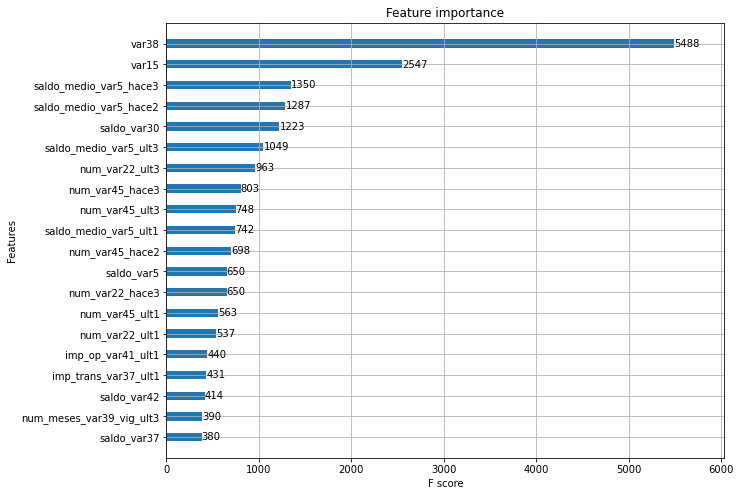

In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_model, ax=ax, max_num_features=20, height=0.4)

In [27]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

pred_proba = lgbm_model.predict_proba(X_test)[:, 1]
lgbm_roc_score = roc_auc_score(y_test, pred_proba, average="macro")
print("ROC AUC:", np.round(lgbm_roc_score, 4))

[1]	valid_0's auc: 0.813679	valid_0's binary_logloss: 0.160517
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.816247	valid_0's binary_logloss: 0.155845
[3]	valid_0's auc: 0.821718	valid_0's binary_logloss: 0.152429
[4]	valid_0's auc: 0.82338	valid_0's binary_logloss: 0.149831
[5]	valid_0's auc: 0.825588	valid_0's binary_logloss: 0.147763
[6]	valid_0's auc: 0.827015	valid_0's binary_logloss: 0.146103
[7]	valid_0's auc: 0.829829	valid_0's binary_logloss: 0.144603
[8]	valid_0's auc: 0.830974	valid_0's binary_logloss: 0.143448
[9]	valid_0's auc: 0.831217	valid_0's binary_logloss: 0.142542
[10]	valid_0's auc: 0.832593	valid_0's binary_logloss: 0.141662
[11]	valid_0's auc: 0.833085	valid_0's binary_logloss: 0.140963
[12]	valid_0's auc: 0.833945	valid_0's binary_logloss: 0.140352
[13]	valid_0's auc: 0.834582	valid_0's binary_logloss: 0.139701
[14]	valid_0's auc: 0.83615	valid_0's binary_logloss: 0.139273
[15]	valid_0's auc: 0.837207	valid_0's binary_logloss

[131]	valid_0's auc: 0.837261	valid_0's binary_logloss: 0.137516
[132]	valid_0's auc: 0.836934	valid_0's binary_logloss: 0.137604
[133]	valid_0's auc: 0.83694	valid_0's binary_logloss: 0.137649
[134]	valid_0's auc: 0.836864	valid_0's binary_logloss: 0.137677
[135]	valid_0's auc: 0.836687	valid_0's binary_logloss: 0.13774
[136]	valid_0's auc: 0.836623	valid_0's binary_logloss: 0.137763
[137]	valid_0's auc: 0.83634	valid_0's binary_logloss: 0.137828
[138]	valid_0's auc: 0.83617	valid_0's binary_logloss: 0.137894
[139]	valid_0's auc: 0.835863	valid_0's binary_logloss: 0.137954
[140]	valid_0's auc: 0.835794	valid_0's binary_logloss: 0.137998
[141]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.137991
[142]	valid_0's auc: 0.836064	valid_0's binary_logloss: 0.137982
[143]	valid_0's auc: 0.835941	valid_0's binary_logloss: 0.138022
[144]	valid_0's auc: 0.835744	valid_0's binary_logloss: 0.138098
[145]	valid_0's auc: 0.835683	valid_0's binary_logloss: 0.138106
[146]	valid_0's auc: 0.835489	

In [31]:
from sklearn.model_selection import GridSearchCV

lgbm_model = LGBMClassifier(n_estimators=200)

params = {
    "num_leaves": [32, 64],
    "max_depth": [128, 160],
    'min_child_samples': [60, 100],
    "subsample": [0.8, 1]
}

grid_cv = GridSearchCV(lgbm_model, param_grid=params, cv=3)
grid_cv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print("GridSearchCV best hyper parameter:", grid_cv.best_params_)
pred_proba = grid_cv.predict_proba(X_test)[:, 1]
lgbm_roc_score = roc_auc_score(y_test, pred_proba, average="macro")
print("ROC AUC:", np.round(lgbm_roc_score, 4))

[1]	valid_0's auc: 0.826422	valid_0's binary_logloss: 0.157408	valid_1's auc: 0.812381	valid_1's binary_logloss: 0.160296
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832908	valid_0's binary_logloss: 0.152159	valid_1's auc: 0.818258	valid_1's binary_logloss: 0.155693
[3]	valid_0's auc: 0.837226	valid_0's binary_logloss: 0.148201	valid_1's auc: 0.82399	valid_1's binary_logloss: 0.152162
[4]	valid_0's auc: 0.841208	valid_0's binary_logloss: 0.145257	valid_1's auc: 0.824903	valid_1's binary_logloss: 0.149604
[5]	valid_0's auc: 0.844895	valid_0's binary_logloss: 0.142855	valid_1's auc: 0.827201	valid_1's binary_logloss: 0.147704
[6]	valid_0's auc: 0.846969	valid_0's binary_logloss: 0.140783	valid_1's auc: 0.828908	valid_1's binary_logloss: 0.146049
[7]	valid_0's auc: 0.848043	valid_0's binary_logloss: 0.139035	valid_1's auc: 0.828878	valid_1's binary_logloss: 0.144685
[8]	valid_0's auc: 0.849378	valid_0's binary_logloss: 0.137589	valid_1's auc: 0.828333

[15]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.130581	valid_1's auc: 0.834322	valid_1's binary_logloss: 0.138813
[16]	valid_0's auc: 0.862146	valid_0's binary_logloss: 0.129976	valid_1's auc: 0.835301	valid_1's binary_logloss: 0.138447
[17]	valid_0's auc: 0.862872	valid_0's binary_logloss: 0.129468	valid_1's auc: 0.835948	valid_1's binary_logloss: 0.138112
[18]	valid_0's auc: 0.864141	valid_0's binary_logloss: 0.128919	valid_1's auc: 0.83707	valid_1's binary_logloss: 0.137722
[19]	valid_0's auc: 0.864649	valid_0's binary_logloss: 0.12851	valid_1's auc: 0.837643	valid_1's binary_logloss: 0.137482
[20]	valid_0's auc: 0.866074	valid_0's binary_logloss: 0.128061	valid_1's auc: 0.838176	valid_1's binary_logloss: 0.137251
[21]	valid_0's auc: 0.86722	valid_0's binary_logloss: 0.127569	valid_1's auc: 0.838235	valid_1's binary_logloss: 0.137032
[22]	valid_0's auc: 0.868135	valid_0's binary_logloss: 0.127184	valid_1's auc: 0.838424	valid_1's binary_logloss: 0.136838
[23]	valid_0's auc:

[18]	valid_0's auc: 0.862233	valid_0's binary_logloss: 0.129155	valid_1's auc: 0.834295	valid_1's binary_logloss: 0.138233
[19]	valid_0's auc: 0.863156	valid_0's binary_logloss: 0.128667	valid_1's auc: 0.83402	valid_1's binary_logloss: 0.138148
[20]	valid_0's auc: 0.865001	valid_0's binary_logloss: 0.128146	valid_1's auc: 0.833501	valid_1's binary_logloss: 0.138035
[21]	valid_0's auc: 0.865755	valid_0's binary_logloss: 0.127731	valid_1's auc: 0.833441	valid_1's binary_logloss: 0.137883
[22]	valid_0's auc: 0.866983	valid_0's binary_logloss: 0.127321	valid_1's auc: 0.833381	valid_1's binary_logloss: 0.137766
[23]	valid_0's auc: 0.867592	valid_0's binary_logloss: 0.126972	valid_1's auc: 0.83435	valid_1's binary_logloss: 0.137574
[24]	valid_0's auc: 0.868369	valid_0's binary_logloss: 0.126617	valid_1's auc: 0.834762	valid_1's binary_logloss: 0.137408
[25]	valid_0's auc: 0.869688	valid_0's binary_logloss: 0.126254	valid_1's auc: 0.8356	valid_1's binary_logloss: 0.137229
[26]	valid_0's auc: 

[17]	valid_0's auc: 0.861658	valid_0's binary_logloss: 0.129949	valid_1's auc: 0.833487	valid_1's binary_logloss: 0.138671
[18]	valid_0's auc: 0.863123	valid_0's binary_logloss: 0.12938	valid_1's auc: 0.834237	valid_1's binary_logloss: 0.138377
[19]	valid_0's auc: 0.86432	valid_0's binary_logloss: 0.128852	valid_1's auc: 0.834099	valid_1's binary_logloss: 0.138224
[20]	valid_0's auc: 0.865422	valid_0's binary_logloss: 0.128435	valid_1's auc: 0.834657	valid_1's binary_logloss: 0.137993
[21]	valid_0's auc: 0.866324	valid_0's binary_logloss: 0.127971	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.137877
[22]	valid_0's auc: 0.867617	valid_0's binary_logloss: 0.127508	valid_1's auc: 0.835183	valid_1's binary_logloss: 0.137709
[23]	valid_0's auc: 0.868704	valid_0's binary_logloss: 0.127077	valid_1's auc: 0.835214	valid_1's binary_logloss: 0.137612
[24]	valid_0's auc: 0.869567	valid_0's binary_logloss: 0.126698	valid_1's auc: 0.83558	valid_1's binary_logloss: 0.137505
[25]	valid_0's auc:

[33]	valid_0's auc: 0.876915	valid_0's binary_logloss: 0.123724	valid_1's auc: 0.838797	valid_1's binary_logloss: 0.136248
[34]	valid_0's auc: 0.877629	valid_0's binary_logloss: 0.12343	valid_1's auc: 0.839049	valid_1's binary_logloss: 0.13622
[35]	valid_0's auc: 0.878096	valid_0's binary_logloss: 0.123195	valid_1's auc: 0.839037	valid_1's binary_logloss: 0.136247
[36]	valid_0's auc: 0.878914	valid_0's binary_logloss: 0.122891	valid_1's auc: 0.83872	valid_1's binary_logloss: 0.136279
[37]	valid_0's auc: 0.879476	valid_0's binary_logloss: 0.122618	valid_1's auc: 0.838478	valid_1's binary_logloss: 0.136269
[38]	valid_0's auc: 0.87999	valid_0's binary_logloss: 0.122381	valid_1's auc: 0.838633	valid_1's binary_logloss: 0.13623
[39]	valid_0's auc: 0.880508	valid_0's binary_logloss: 0.122136	valid_1's auc: 0.838966	valid_1's binary_logloss: 0.136202
[40]	valid_0's auc: 0.881185	valid_0's binary_logloss: 0.121907	valid_1's auc: 0.839036	valid_1's binary_logloss: 0.136195
[41]	valid_0's auc: 0

[45]	valid_0's auc: 0.882373	valid_0's binary_logloss: 0.121189	valid_1's auc: 0.836627	valid_1's binary_logloss: 0.136856
[46]	valid_0's auc: 0.88324	valid_0's binary_logloss: 0.120933	valid_1's auc: 0.836604	valid_1's binary_logloss: 0.136831
[47]	valid_0's auc: 0.883723	valid_0's binary_logloss: 0.120739	valid_1's auc: 0.836338	valid_1's binary_logloss: 0.136896
[48]	valid_0's auc: 0.884098	valid_0's binary_logloss: 0.120572	valid_1's auc: 0.83645	valid_1's binary_logloss: 0.136905
[49]	valid_0's auc: 0.884639	valid_0's binary_logloss: 0.120351	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.136887
[50]	valid_0's auc: 0.884918	valid_0's binary_logloss: 0.120215	valid_1's auc: 0.836589	valid_1's binary_logloss: 0.136846
[51]	valid_0's auc: 0.885315	valid_0's binary_logloss: 0.120021	valid_1's auc: 0.836637	valid_1's binary_logloss: 0.136848
[52]	valid_0's auc: 0.885662	valid_0's binary_logloss: 0.119858	valid_1's auc: 0.836664	valid_1's binary_logloss: 0.136858
[53]	valid_0's auc

[47]	valid_0's auc: 0.904595	valid_0's binary_logloss: 0.112861	valid_1's auc: 0.829925	valid_1's binary_logloss: 0.138802
[48]	valid_0's auc: 0.905111	valid_0's binary_logloss: 0.112568	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.138895
[49]	valid_0's auc: 0.905447	valid_0's binary_logloss: 0.11231	valid_1's auc: 0.829155	valid_1's binary_logloss: 0.139009
[50]	valid_0's auc: 0.906304	valid_0's binary_logloss: 0.112057	valid_1's auc: 0.829341	valid_1's binary_logloss: 0.139008
[51]	valid_0's auc: 0.906458	valid_0's binary_logloss: 0.111853	valid_1's auc: 0.829435	valid_1's binary_logloss: 0.139037
[52]	valid_0's auc: 0.906971	valid_0's binary_logloss: 0.111579	valid_1's auc: 0.828928	valid_1's binary_logloss: 0.139155
[53]	valid_0's auc: 0.90729	valid_0's binary_logloss: 0.111362	valid_1's auc: 0.828871	valid_1's binary_logloss: 0.139232
[54]	valid_0's auc: 0.907819	valid_0's binary_logloss: 0.111097	valid_1's auc: 0.82899	valid_1's binary_logloss: 0.139256
[55]	valid_0's auc:

[48]	valid_0's auc: 0.903921	valid_0's binary_logloss: 0.112292	valid_1's auc: 0.83212	valid_1's binary_logloss: 0.137855
[49]	valid_0's auc: 0.904608	valid_0's binary_logloss: 0.112003	valid_1's auc: 0.831937	valid_1's binary_logloss: 0.137952
[50]	valid_0's auc: 0.905011	valid_0's binary_logloss: 0.11176	valid_1's auc: 0.831832	valid_1's binary_logloss: 0.138015
[51]	valid_0's auc: 0.905259	valid_0's binary_logloss: 0.111504	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.138157
[52]	valid_0's auc: 0.905493	valid_0's binary_logloss: 0.1113	valid_1's auc: 0.831341	valid_1's binary_logloss: 0.138189
[53]	valid_0's auc: 0.905727	valid_0's binary_logloss: 0.111052	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.138231
[54]	valid_0's auc: 0.906055	valid_0's binary_logloss: 0.110878	valid_1's auc: 0.83184	valid_1's binary_logloss: 0.138189
[55]	valid_0's auc: 0.906325	valid_0's binary_logloss: 0.110683	valid_1's auc: 0.831848	valid_1's binary_logloss: 0.138219
[56]	valid_0's auc: 0

[59]	valid_0's auc: 0.908009	valid_0's binary_logloss: 0.109567	valid_1's auc: 0.827953	valid_1's binary_logloss: 0.139308
[60]	valid_0's auc: 0.90839	valid_0's binary_logloss: 0.109328	valid_1's auc: 0.827545	valid_1's binary_logloss: 0.139438
[61]	valid_0's auc: 0.90879	valid_0's binary_logloss: 0.109129	valid_1's auc: 0.827351	valid_1's binary_logloss: 0.139471
Early stopping, best iteration is:
[31]	valid_0's auc: 0.892673	valid_0's binary_logloss: 0.117835	valid_1's auc: 0.832168	valid_1's binary_logloss: 0.137716
[1]	valid_0's auc: 0.832328	valid_0's binary_logloss: 0.156827	valid_1's auc: 0.810774	valid_1's binary_logloss: 0.160168
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842837	valid_0's binary_logloss: 0.151024	valid_1's auc: 0.820542	valid_1's binary_logloss: 0.155433
[3]	valid_0's auc: 0.848065	valid_0's binary_logloss: 0.146804	valid_1's auc: 0.823784	valid_1's binary_logloss: 0.152038
[4]	valid_0's auc: 0.852471	valid_0's binary_log

[64]	valid_0's auc: 0.91032	valid_0's binary_logloss: 0.108949	valid_1's auc: 0.828351	valid_1's binary_logloss: 0.139785
[65]	valid_0's auc: 0.910573	valid_0's binary_logloss: 0.108761	valid_1's auc: 0.82808	valid_1's binary_logloss: 0.139863
[66]	valid_0's auc: 0.910586	valid_0's binary_logloss: 0.108616	valid_1's auc: 0.827627	valid_1's binary_logloss: 0.140033
Early stopping, best iteration is:
[36]	valid_0's auc: 0.897508	valid_0's binary_logloss: 0.116227	valid_1's auc: 0.830756	valid_1's binary_logloss: 0.138268
[1]	valid_0's auc: 0.836154	valid_0's binary_logloss: 0.15636	valid_1's auc: 0.812422	valid_1's binary_logloss: 0.160342
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84331	valid_0's binary_logloss: 0.15047	valid_1's auc: 0.816892	valid_1's binary_logloss: 0.155317
[3]	valid_0's auc: 0.848814	valid_0's binary_logloss: 0.146226	valid_1's auc: 0.822462	valid_1's binary_logloss: 0.151803
[4]	valid_0's auc: 0.853343	valid_0's binary_loglos

[1]	valid_0's auc: 0.832758	valid_0's binary_logloss: 0.156619	valid_1's auc: 0.811844	valid_1's binary_logloss: 0.160446
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841456	valid_0's binary_logloss: 0.150715	valid_1's auc: 0.815443	valid_1's binary_logloss: 0.155468
[3]	valid_0's auc: 0.846562	valid_0's binary_logloss: 0.146526	valid_1's auc: 0.822762	valid_1's binary_logloss: 0.151967
[4]	valid_0's auc: 0.851837	valid_0's binary_logloss: 0.14325	valid_1's auc: 0.826432	valid_1's binary_logloss: 0.149496
[5]	valid_0's auc: 0.854993	valid_0's binary_logloss: 0.140563	valid_1's auc: 0.82819	valid_1's binary_logloss: 0.147285
[6]	valid_0's auc: 0.858145	valid_0's binary_logloss: 0.138286	valid_1's auc: 0.827472	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.860138	valid_0's binary_logloss: 0.13626	valid_1's auc: 0.828316	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.861422	valid_0's binary_logloss: 0.134653	valid_1's auc: 0.828595	v

[18]	valid_0's auc: 0.862888	valid_0's binary_logloss: 0.129956	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.138097
[19]	valid_0's auc: 0.864299	valid_0's binary_logloss: 0.129383	valid_1's auc: 0.836983	valid_1's binary_logloss: 0.137794
[20]	valid_0's auc: 0.865366	valid_0's binary_logloss: 0.128948	valid_1's auc: 0.837261	valid_1's binary_logloss: 0.137555
[21]	valid_0's auc: 0.866393	valid_0's binary_logloss: 0.128505	valid_1's auc: 0.837206	valid_1's binary_logloss: 0.137416
[22]	valid_0's auc: 0.867236	valid_0's binary_logloss: 0.128138	valid_1's auc: 0.837603	valid_1's binary_logloss: 0.13723
[23]	valid_0's auc: 0.868012	valid_0's binary_logloss: 0.127751	valid_1's auc: 0.837937	valid_1's binary_logloss: 0.137061
[24]	valid_0's auc: 0.868748	valid_0's binary_logloss: 0.127409	valid_1's auc: 0.837757	valid_1's binary_logloss: 0.136989
[25]	valid_0's auc: 0.869658	valid_0's binary_logloss: 0.127041	valid_1's auc: 0.837877	valid_1's binary_logloss: 0.136899
[26]	valid_0's au

[17]	valid_0's auc: 0.860319	valid_0's binary_logloss: 0.13027	valid_1's auc: 0.833607	valid_1's binary_logloss: 0.138091
[18]	valid_0's auc: 0.860757	valid_0's binary_logloss: 0.12982	valid_1's auc: 0.833524	valid_1's binary_logloss: 0.137891
[19]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.129351	valid_1's auc: 0.834665	valid_1's binary_logloss: 0.137642
[20]	valid_0's auc: 0.863489	valid_0's binary_logloss: 0.128898	valid_1's auc: 0.835886	valid_1's binary_logloss: 0.137332
[21]	valid_0's auc: 0.864713	valid_0's binary_logloss: 0.128459	valid_1's auc: 0.836038	valid_1's binary_logloss: 0.137166
[22]	valid_0's auc: 0.86573	valid_0's binary_logloss: 0.128096	valid_1's auc: 0.835864	valid_1's binary_logloss: 0.137086
[23]	valid_0's auc: 0.866841	valid_0's binary_logloss: 0.127686	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.136851
[24]	valid_0's auc: 0.867731	valid_0's binary_logloss: 0.127324	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.136795
[25]	valid_0's auc:

[17]	valid_0's auc: 0.859577	valid_0's binary_logloss: 0.130343	valid_1's auc: 0.835107	valid_1's binary_logloss: 0.138152
[18]	valid_0's auc: 0.86039	valid_0's binary_logloss: 0.129864	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.137868
[19]	valid_0's auc: 0.86152	valid_0's binary_logloss: 0.129432	valid_1's auc: 0.835383	valid_1's binary_logloss: 0.137679
[20]	valid_0's auc: 0.863142	valid_0's binary_logloss: 0.128954	valid_1's auc: 0.835493	valid_1's binary_logloss: 0.137503
[21]	valid_0's auc: 0.863942	valid_0's binary_logloss: 0.128568	valid_1's auc: 0.83544	valid_1's binary_logloss: 0.137411
[22]	valid_0's auc: 0.864598	valid_0's binary_logloss: 0.128207	valid_1's auc: 0.835597	valid_1's binary_logloss: 0.137267
[23]	valid_0's auc: 0.865501	valid_0's binary_logloss: 0.127791	valid_1's auc: 0.836262	valid_1's binary_logloss: 0.137073
[24]	valid_0's auc: 0.866804	valid_0's binary_logloss: 0.127434	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.137071
[25]	valid_0's auc:

[18]	valid_0's auc: 0.862888	valid_0's binary_logloss: 0.129956	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.138097
[19]	valid_0's auc: 0.864299	valid_0's binary_logloss: 0.129383	valid_1's auc: 0.836983	valid_1's binary_logloss: 0.137794
[20]	valid_0's auc: 0.865366	valid_0's binary_logloss: 0.128948	valid_1's auc: 0.837261	valid_1's binary_logloss: 0.137555
[21]	valid_0's auc: 0.866393	valid_0's binary_logloss: 0.128505	valid_1's auc: 0.837206	valid_1's binary_logloss: 0.137416
[22]	valid_0's auc: 0.867236	valid_0's binary_logloss: 0.128138	valid_1's auc: 0.837603	valid_1's binary_logloss: 0.13723
[23]	valid_0's auc: 0.868012	valid_0's binary_logloss: 0.127751	valid_1's auc: 0.837937	valid_1's binary_logloss: 0.137061
[24]	valid_0's auc: 0.868748	valid_0's binary_logloss: 0.127409	valid_1's auc: 0.837757	valid_1's binary_logloss: 0.136989
[25]	valid_0's auc: 0.869658	valid_0's binary_logloss: 0.127041	valid_1's auc: 0.837877	valid_1's binary_logloss: 0.136899
[26]	valid_0's au

[18]	valid_0's auc: 0.860757	valid_0's binary_logloss: 0.12982	valid_1's auc: 0.833524	valid_1's binary_logloss: 0.137891
[19]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.129351	valid_1's auc: 0.834665	valid_1's binary_logloss: 0.137642
[20]	valid_0's auc: 0.863489	valid_0's binary_logloss: 0.128898	valid_1's auc: 0.835886	valid_1's binary_logloss: 0.137332
[21]	valid_0's auc: 0.864713	valid_0's binary_logloss: 0.128459	valid_1's auc: 0.836038	valid_1's binary_logloss: 0.137166
[22]	valid_0's auc: 0.86573	valid_0's binary_logloss: 0.128096	valid_1's auc: 0.835864	valid_1's binary_logloss: 0.137086
[23]	valid_0's auc: 0.866841	valid_0's binary_logloss: 0.127686	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.136851
[24]	valid_0's auc: 0.867731	valid_0's binary_logloss: 0.127324	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.136795
[25]	valid_0's auc: 0.868847	valid_0's binary_logloss: 0.126952	valid_1's auc: 0.836575	valid_1's binary_logloss: 0.136718
[26]	valid_0's auc

[19]	valid_0's auc: 0.86152	valid_0's binary_logloss: 0.129432	valid_1's auc: 0.835383	valid_1's binary_logloss: 0.137679
[20]	valid_0's auc: 0.863142	valid_0's binary_logloss: 0.128954	valid_1's auc: 0.835493	valid_1's binary_logloss: 0.137503
[21]	valid_0's auc: 0.863942	valid_0's binary_logloss: 0.128568	valid_1's auc: 0.83544	valid_1's binary_logloss: 0.137411
[22]	valid_0's auc: 0.864598	valid_0's binary_logloss: 0.128207	valid_1's auc: 0.835597	valid_1's binary_logloss: 0.137267
[23]	valid_0's auc: 0.865501	valid_0's binary_logloss: 0.127791	valid_1's auc: 0.836262	valid_1's binary_logloss: 0.137073
[24]	valid_0's auc: 0.866804	valid_0's binary_logloss: 0.127434	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.137071
[25]	valid_0's auc: 0.867784	valid_0's binary_logloss: 0.127111	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.136999
[26]	valid_0's auc: 0.868183	valid_0's binary_logloss: 0.126818	valid_1's auc: 0.835543	valid_1's binary_logloss: 0.136948
[27]	valid_0's auc

[25]	valid_0's auc: 0.883496	valid_0's binary_logloss: 0.122372	valid_1's auc: 0.831066	valid_1's binary_logloss: 0.1383
[26]	valid_0's auc: 0.884246	valid_0's binary_logloss: 0.121897	valid_1's auc: 0.831403	valid_1's binary_logloss: 0.138215
[27]	valid_0's auc: 0.885146	valid_0's binary_logloss: 0.121444	valid_1's auc: 0.831665	valid_1's binary_logloss: 0.138181
[28]	valid_0's auc: 0.885954	valid_0's binary_logloss: 0.121021	valid_1's auc: 0.831871	valid_1's binary_logloss: 0.13816
[29]	valid_0's auc: 0.887201	valid_0's binary_logloss: 0.120605	valid_1's auc: 0.832104	valid_1's binary_logloss: 0.138189
[30]	valid_0's auc: 0.887794	valid_0's binary_logloss: 0.120235	valid_1's auc: 0.832054	valid_1's binary_logloss: 0.138168
[31]	valid_0's auc: 0.888985	valid_0's binary_logloss: 0.119807	valid_1's auc: 0.831932	valid_1's binary_logloss: 0.138156
[32]	valid_0's auc: 0.889903	valid_0's binary_logloss: 0.119415	valid_1's auc: 0.832427	valid_1's binary_logloss: 0.138062
[33]	valid_0's auc:

[1]	valid_0's auc: 0.832556	valid_0's binary_logloss: 0.157001	valid_1's auc: 0.815198	valid_1's binary_logloss: 0.160287
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84268	valid_0's binary_logloss: 0.15135	valid_1's auc: 0.824396	valid_1's binary_logloss: 0.15537
[3]	valid_0's auc: 0.848681	valid_0's binary_logloss: 0.147248	valid_1's auc: 0.82665	valid_1's binary_logloss: 0.15194
[4]	valid_0's auc: 0.852147	valid_0's binary_logloss: 0.144006	valid_1's auc: 0.827459	valid_1's binary_logloss: 0.149337
[5]	valid_0's auc: 0.854979	valid_0's binary_logloss: 0.14131	valid_1's auc: 0.829498	valid_1's binary_logloss: 0.147254
[6]	valid_0's auc: 0.857531	valid_0's binary_logloss: 0.139102	valid_1's auc: 0.829365	valid_1's binary_logloss: 0.14572
[7]	valid_0's auc: 0.858814	valid_0's binary_logloss: 0.137264	valid_1's auc: 0.829644	valid_1's binary_logloss: 0.144482
[8]	valid_0's auc: 0.859601	valid_0's binary_logloss: 0.135738	valid_1's auc: 0.830342	valid

[14]	valid_0's auc: 0.872379	valid_0's binary_logloss: 0.128576	valid_1's auc: 0.835513	valid_1's binary_logloss: 0.138708
[15]	valid_0's auc: 0.873805	valid_0's binary_logloss: 0.127764	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.138316
[16]	valid_0's auc: 0.875077	valid_0's binary_logloss: 0.127015	valid_1's auc: 0.835726	valid_1's binary_logloss: 0.137996
[17]	valid_0's auc: 0.875817	valid_0's binary_logloss: 0.126386	valid_1's auc: 0.835891	valid_1's binary_logloss: 0.137674
[18]	valid_0's auc: 0.876918	valid_0's binary_logloss: 0.125742	valid_1's auc: 0.835412	valid_1's binary_logloss: 0.137519
[19]	valid_0's auc: 0.877563	valid_0's binary_logloss: 0.125189	valid_1's auc: 0.835651	valid_1's binary_logloss: 0.137316
[20]	valid_0's auc: 0.878625	valid_0's binary_logloss: 0.124625	valid_1's auc: 0.836309	valid_1's binary_logloss: 0.137102
[21]	valid_0's auc: 0.879368	valid_0's binary_logloss: 0.124125	valid_1's auc: 0.836209	valid_1's binary_logloss: 0.137009
[22]	valid_0's a

[35]	valid_0's auc: 0.892393	valid_0's binary_logloss: 0.118123	valid_1's auc: 0.829907	valid_1's binary_logloss: 0.138336
[36]	valid_0's auc: 0.893055	valid_0's binary_logloss: 0.117778	valid_1's auc: 0.830191	valid_1's binary_logloss: 0.138335
[37]	valid_0's auc: 0.893838	valid_0's binary_logloss: 0.117435	valid_1's auc: 0.830367	valid_1's binary_logloss: 0.138308
[38]	valid_0's auc: 0.894704	valid_0's binary_logloss: 0.11702	valid_1's auc: 0.830349	valid_1's binary_logloss: 0.138327
[39]	valid_0's auc: 0.895311	valid_0's binary_logloss: 0.116714	valid_1's auc: 0.830423	valid_1's binary_logloss: 0.138347
[40]	valid_0's auc: 0.896066	valid_0's binary_logloss: 0.116365	valid_1's auc: 0.830199	valid_1's binary_logloss: 0.138434
Early stopping, best iteration is:
[10]	valid_0's auc: 0.861903	valid_0's binary_logloss: 0.132949	valid_1's auc: 0.831633	valid_1's binary_logloss: 0.141357
[1]	valid_0's auc: 0.826422	valid_0's binary_logloss: 0.157408	valid_1's auc: 0.812381	valid_1's binary_l

[19]	valid_0's auc: 0.864649	valid_0's binary_logloss: 0.12851	valid_1's auc: 0.837643	valid_1's binary_logloss: 0.137482
[20]	valid_0's auc: 0.866074	valid_0's binary_logloss: 0.128061	valid_1's auc: 0.838176	valid_1's binary_logloss: 0.137251
[21]	valid_0's auc: 0.86722	valid_0's binary_logloss: 0.127569	valid_1's auc: 0.838235	valid_1's binary_logloss: 0.137032
[22]	valid_0's auc: 0.868135	valid_0's binary_logloss: 0.127184	valid_1's auc: 0.838424	valid_1's binary_logloss: 0.136838
[23]	valid_0's auc: 0.869195	valid_0's binary_logloss: 0.12679	valid_1's auc: 0.838647	valid_1's binary_logloss: 0.136735
[24]	valid_0's auc: 0.869843	valid_0's binary_logloss: 0.126453	valid_1's auc: 0.838757	valid_1's binary_logloss: 0.136566
[25]	valid_0's auc: 0.871025	valid_0's binary_logloss: 0.126078	valid_1's auc: 0.838493	valid_1's binary_logloss: 0.13652
[26]	valid_0's auc: 0.871744	valid_0's binary_logloss: 0.125735	valid_1's auc: 0.838549	valid_1's binary_logloss: 0.136458
[27]	valid_0's auc: 

[34]	valid_0's auc: 0.875683	valid_0's binary_logloss: 0.123671	valid_1's auc: 0.835827	valid_1's binary_logloss: 0.136939
[35]	valid_0's auc: 0.876093	valid_0's binary_logloss: 0.123456	valid_1's auc: 0.835662	valid_1's binary_logloss: 0.136963
[36]	valid_0's auc: 0.876702	valid_0's binary_logloss: 0.123197	valid_1's auc: 0.836233	valid_1's binary_logloss: 0.136865
[37]	valid_0's auc: 0.877761	valid_0's binary_logloss: 0.122924	valid_1's auc: 0.836277	valid_1's binary_logloss: 0.136864
[38]	valid_0's auc: 0.878335	valid_0's binary_logloss: 0.122711	valid_1's auc: 0.8361	valid_1's binary_logloss: 0.136857
[39]	valid_0's auc: 0.879152	valid_0's binary_logloss: 0.122467	valid_1's auc: 0.835901	valid_1's binary_logloss: 0.136934
[40]	valid_0's auc: 0.879613	valid_0's binary_logloss: 0.122254	valid_1's auc: 0.836293	valid_1's binary_logloss: 0.136871
[41]	valid_0's auc: 0.880427	valid_0's binary_logloss: 0.12198	valid_1's auc: 0.836702	valid_1's binary_logloss: 0.136841
[42]	valid_0's auc:

[35]	valid_0's auc: 0.878253	valid_0's binary_logloss: 0.123353	valid_1's auc: 0.834468	valid_1's binary_logloss: 0.137182
[36]	valid_0's auc: 0.879612	valid_0's binary_logloss: 0.123035	valid_1's auc: 0.834223	valid_1's binary_logloss: 0.137237
[37]	valid_0's auc: 0.88068	valid_0's binary_logloss: 0.122688	valid_1's auc: 0.834488	valid_1's binary_logloss: 0.137208
[38]	valid_0's auc: 0.881034	valid_0's binary_logloss: 0.122477	valid_1's auc: 0.834521	valid_1's binary_logloss: 0.137205
[39]	valid_0's auc: 0.881592	valid_0's binary_logloss: 0.122274	valid_1's auc: 0.834411	valid_1's binary_logloss: 0.13725
[40]	valid_0's auc: 0.88214	valid_0's binary_logloss: 0.122049	valid_1's auc: 0.833999	valid_1's binary_logloss: 0.137347
[41]	valid_0's auc: 0.882643	valid_0's binary_logloss: 0.12184	valid_1's auc: 0.833853	valid_1's binary_logloss: 0.137394
[42]	valid_0's auc: 0.882963	valid_0's binary_logloss: 0.121628	valid_1's auc: 0.834363	valid_1's binary_logloss: 0.137307
[43]	valid_0's auc: 

[49]	valid_0's auc: 0.886258	valid_0's binary_logloss: 0.120052	valid_1's auc: 0.838116	valid_1's binary_logloss: 0.136303
[50]	valid_0's auc: 0.88662	valid_0's binary_logloss: 0.119859	valid_1's auc: 0.838085	valid_1's binary_logloss: 0.136317
[51]	valid_0's auc: 0.887167	valid_0's binary_logloss: 0.11968	valid_1's auc: 0.838161	valid_1's binary_logloss: 0.136325
[52]	valid_0's auc: 0.887857	valid_0's binary_logloss: 0.119444	valid_1's auc: 0.838371	valid_1's binary_logloss: 0.136269
[53]	valid_0's auc: 0.888091	valid_0's binary_logloss: 0.119267	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.136287
[54]	valid_0's auc: 0.888405	valid_0's binary_logloss: 0.119124	valid_1's auc: 0.838074	valid_1's binary_logloss: 0.136322
[55]	valid_0's auc: 0.889127	valid_0's binary_logloss: 0.118949	valid_1's auc: 0.838129	valid_1's binary_logloss: 0.136294
[56]	valid_0's auc: 0.88936	valid_0's binary_logloss: 0.118789	valid_1's auc: 0.838055	valid_1's binary_logloss: 0.136312
[57]	valid_0's auc:

[64]	valid_0's auc: 0.890888	valid_0's binary_logloss: 0.117584	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.137101
[65]	valid_0's auc: 0.89115	valid_0's binary_logloss: 0.117449	valid_1's auc: 0.835528	valid_1's binary_logloss: 0.137159
[66]	valid_0's auc: 0.891381	valid_0's binary_logloss: 0.11733	valid_1's auc: 0.835161	valid_1's binary_logloss: 0.137229
[67]	valid_0's auc: 0.891658	valid_0's binary_logloss: 0.117194	valid_1's auc: 0.835227	valid_1's binary_logloss: 0.137199
[68]	valid_0's auc: 0.892028	valid_0's binary_logloss: 0.117034	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.137259
[69]	valid_0's auc: 0.892742	valid_0's binary_logloss: 0.116805	valid_1's auc: 0.834803	valid_1's binary_logloss: 0.137331
[70]	valid_0's auc: 0.89293	valid_0's binary_logloss: 0.11668	valid_1's auc: 0.834757	valid_1's binary_logloss: 0.137352
[71]	valid_0's auc: 0.893148	valid_0's binary_logloss: 0.116526	valid_1's auc: 0.834602	valid_1's binary_logloss: 0.13739
[72]	valid_0's auc: 0

[62]	valid_0's auc: 0.910321	valid_0's binary_logloss: 0.109265	valid_1's auc: 0.828957	valid_1's binary_logloss: 0.139589
[63]	valid_0's auc: 0.910296	valid_0's binary_logloss: 0.109137	valid_1's auc: 0.828876	valid_1's binary_logloss: 0.139644
[64]	valid_0's auc: 0.91032	valid_0's binary_logloss: 0.108949	valid_1's auc: 0.828351	valid_1's binary_logloss: 0.139785
[65]	valid_0's auc: 0.910573	valid_0's binary_logloss: 0.108761	valid_1's auc: 0.82808	valid_1's binary_logloss: 0.139863
[66]	valid_0's auc: 0.910586	valid_0's binary_logloss: 0.108616	valid_1's auc: 0.827627	valid_1's binary_logloss: 0.140033
Early stopping, best iteration is:
[36]	valid_0's auc: 0.897508	valid_0's binary_logloss: 0.116227	valid_1's auc: 0.830756	valid_1's binary_logloss: 0.138268
[1]	valid_0's auc: 0.836154	valid_0's binary_logloss: 0.15636	valid_1's auc: 0.812422	valid_1's binary_logloss: 0.160342
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84331	valid_0's binary_log

[60]	valid_0's auc: 0.90839	valid_0's binary_logloss: 0.109328	valid_1's auc: 0.827545	valid_1's binary_logloss: 0.139438
[61]	valid_0's auc: 0.90879	valid_0's binary_logloss: 0.109129	valid_1's auc: 0.827351	valid_1's binary_logloss: 0.139471
Early stopping, best iteration is:
[31]	valid_0's auc: 0.892673	valid_0's binary_logloss: 0.117835	valid_1's auc: 0.832168	valid_1's binary_logloss: 0.137716
[1]	valid_0's auc: 0.832328	valid_0's binary_logloss: 0.156827	valid_1's auc: 0.810774	valid_1's binary_logloss: 0.160168
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842837	valid_0's binary_logloss: 0.151024	valid_1's auc: 0.820542	valid_1's binary_logloss: 0.155433
[3]	valid_0's auc: 0.848065	valid_0's binary_logloss: 0.146804	valid_1's auc: 0.823784	valid_1's binary_logloss: 0.152038
[4]	valid_0's auc: 0.852471	valid_0's binary_logloss: 0.143487	valid_1's auc: 0.825488	valid_1's binary_logloss: 0.149481
[5]	valid_0's auc: 0.855798	valid_0's binary_logl

[1]	valid_0's auc: 0.836154	valid_0's binary_logloss: 0.15636	valid_1's auc: 0.812422	valid_1's binary_logloss: 0.160342
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84331	valid_0's binary_logloss: 0.15047	valid_1's auc: 0.816892	valid_1's binary_logloss: 0.155317
[3]	valid_0's auc: 0.848814	valid_0's binary_logloss: 0.146226	valid_1's auc: 0.822462	valid_1's binary_logloss: 0.151803
[4]	valid_0's auc: 0.853343	valid_0's binary_logloss: 0.142882	valid_1's auc: 0.825931	valid_1's binary_logloss: 0.149273
[5]	valid_0's auc: 0.856169	valid_0's binary_logloss: 0.140165	valid_1's auc: 0.827212	valid_1's binary_logloss: 0.147297
[6]	valid_0's auc: 0.858084	valid_0's binary_logloss: 0.137966	valid_1's auc: 0.827089	valid_1's binary_logloss: 0.145763
[7]	valid_0's auc: 0.860642	valid_0's binary_logloss: 0.136073	valid_1's auc: 0.827793	valid_1's binary_logloss: 0.144511
[8]	valid_0's auc: 0.862742	valid_0's binary_logloss: 0.134408	valid_1's auc: 0.828519	v

[1]	valid_0's auc: 0.832758	valid_0's binary_logloss: 0.156619	valid_1's auc: 0.811844	valid_1's binary_logloss: 0.160446
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841456	valid_0's binary_logloss: 0.150715	valid_1's auc: 0.815443	valid_1's binary_logloss: 0.155468
[3]	valid_0's auc: 0.846562	valid_0's binary_logloss: 0.146526	valid_1's auc: 0.822762	valid_1's binary_logloss: 0.151967
[4]	valid_0's auc: 0.851837	valid_0's binary_logloss: 0.14325	valid_1's auc: 0.826432	valid_1's binary_logloss: 0.149496
[5]	valid_0's auc: 0.854993	valid_0's binary_logloss: 0.140563	valid_1's auc: 0.82819	valid_1's binary_logloss: 0.147285
[6]	valid_0's auc: 0.858145	valid_0's binary_logloss: 0.138286	valid_1's auc: 0.827472	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.860138	valid_0's binary_logloss: 0.13626	valid_1's auc: 0.828316	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.861422	valid_0's binary_logloss: 0.134653	valid_1's auc: 0.828595	v

[20]	valid_0's auc: 0.865366	valid_0's binary_logloss: 0.128948	valid_1's auc: 0.837261	valid_1's binary_logloss: 0.137555
[21]	valid_0's auc: 0.866393	valid_0's binary_logloss: 0.128505	valid_1's auc: 0.837206	valid_1's binary_logloss: 0.137416
[22]	valid_0's auc: 0.867236	valid_0's binary_logloss: 0.128138	valid_1's auc: 0.837603	valid_1's binary_logloss: 0.13723
[23]	valid_0's auc: 0.868012	valid_0's binary_logloss: 0.127751	valid_1's auc: 0.837937	valid_1's binary_logloss: 0.137061
[24]	valid_0's auc: 0.868748	valid_0's binary_logloss: 0.127409	valid_1's auc: 0.837757	valid_1's binary_logloss: 0.136989
[25]	valid_0's auc: 0.869658	valid_0's binary_logloss: 0.127041	valid_1's auc: 0.837877	valid_1's binary_logloss: 0.136899
[26]	valid_0's auc: 0.870329	valid_0's binary_logloss: 0.126711	valid_1's auc: 0.83835	valid_1's binary_logloss: 0.136781
[27]	valid_0's auc: 0.870997	valid_0's binary_logloss: 0.126425	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.13673
[28]	valid_0's auc:

[19]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.129351	valid_1's auc: 0.834665	valid_1's binary_logloss: 0.137642
[20]	valid_0's auc: 0.863489	valid_0's binary_logloss: 0.128898	valid_1's auc: 0.835886	valid_1's binary_logloss: 0.137332
[21]	valid_0's auc: 0.864713	valid_0's binary_logloss: 0.128459	valid_1's auc: 0.836038	valid_1's binary_logloss: 0.137166
[22]	valid_0's auc: 0.86573	valid_0's binary_logloss: 0.128096	valid_1's auc: 0.835864	valid_1's binary_logloss: 0.137086
[23]	valid_0's auc: 0.866841	valid_0's binary_logloss: 0.127686	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.136851
[24]	valid_0's auc: 0.867731	valid_0's binary_logloss: 0.127324	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.136795
[25]	valid_0's auc: 0.868847	valid_0's binary_logloss: 0.126952	valid_1's auc: 0.836575	valid_1's binary_logloss: 0.136718
[26]	valid_0's auc: 0.869343	valid_0's binary_logloss: 0.126622	valid_1's auc: 0.837038	valid_1's binary_logloss: 0.136571
[27]	valid_0's au

[19]	valid_0's auc: 0.86152	valid_0's binary_logloss: 0.129432	valid_1's auc: 0.835383	valid_1's binary_logloss: 0.137679
[20]	valid_0's auc: 0.863142	valid_0's binary_logloss: 0.128954	valid_1's auc: 0.835493	valid_1's binary_logloss: 0.137503
[21]	valid_0's auc: 0.863942	valid_0's binary_logloss: 0.128568	valid_1's auc: 0.83544	valid_1's binary_logloss: 0.137411
[22]	valid_0's auc: 0.864598	valid_0's binary_logloss: 0.128207	valid_1's auc: 0.835597	valid_1's binary_logloss: 0.137267
[23]	valid_0's auc: 0.865501	valid_0's binary_logloss: 0.127791	valid_1's auc: 0.836262	valid_1's binary_logloss: 0.137073
[24]	valid_0's auc: 0.866804	valid_0's binary_logloss: 0.127434	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.137071
[25]	valid_0's auc: 0.867784	valid_0's binary_logloss: 0.127111	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.136999
[26]	valid_0's auc: 0.868183	valid_0's binary_logloss: 0.126818	valid_1's auc: 0.835543	valid_1's binary_logloss: 0.136948
[27]	valid_0's auc

[20]	valid_0's auc: 0.865366	valid_0's binary_logloss: 0.128948	valid_1's auc: 0.837261	valid_1's binary_logloss: 0.137555
[21]	valid_0's auc: 0.866393	valid_0's binary_logloss: 0.128505	valid_1's auc: 0.837206	valid_1's binary_logloss: 0.137416
[22]	valid_0's auc: 0.867236	valid_0's binary_logloss: 0.128138	valid_1's auc: 0.837603	valid_1's binary_logloss: 0.13723
[23]	valid_0's auc: 0.868012	valid_0's binary_logloss: 0.127751	valid_1's auc: 0.837937	valid_1's binary_logloss: 0.137061
[24]	valid_0's auc: 0.868748	valid_0's binary_logloss: 0.127409	valid_1's auc: 0.837757	valid_1's binary_logloss: 0.136989
[25]	valid_0's auc: 0.869658	valid_0's binary_logloss: 0.127041	valid_1's auc: 0.837877	valid_1's binary_logloss: 0.136899
[26]	valid_0's auc: 0.870329	valid_0's binary_logloss: 0.126711	valid_1's auc: 0.83835	valid_1's binary_logloss: 0.136781
[27]	valid_0's auc: 0.870997	valid_0's binary_logloss: 0.126425	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.13673
[28]	valid_0's auc:

[16]	valid_0's auc: 0.859484	valid_0's binary_logloss: 0.130801	valid_1's auc: 0.833271	valid_1's binary_logloss: 0.138419
[17]	valid_0's auc: 0.860319	valid_0's binary_logloss: 0.13027	valid_1's auc: 0.833607	valid_1's binary_logloss: 0.138091
[18]	valid_0's auc: 0.860757	valid_0's binary_logloss: 0.12982	valid_1's auc: 0.833524	valid_1's binary_logloss: 0.137891
[19]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.129351	valid_1's auc: 0.834665	valid_1's binary_logloss: 0.137642
[20]	valid_0's auc: 0.863489	valid_0's binary_logloss: 0.128898	valid_1's auc: 0.835886	valid_1's binary_logloss: 0.137332
[21]	valid_0's auc: 0.864713	valid_0's binary_logloss: 0.128459	valid_1's auc: 0.836038	valid_1's binary_logloss: 0.137166
[22]	valid_0's auc: 0.86573	valid_0's binary_logloss: 0.128096	valid_1's auc: 0.835864	valid_1's binary_logloss: 0.137086
[23]	valid_0's auc: 0.866841	valid_0's binary_logloss: 0.127686	valid_1's auc: 0.836476	valid_1's binary_logloss: 0.136851
[24]	valid_0's auc:

[17]	valid_0's auc: 0.859577	valid_0's binary_logloss: 0.130343	valid_1's auc: 0.835107	valid_1's binary_logloss: 0.138152
[18]	valid_0's auc: 0.86039	valid_0's binary_logloss: 0.129864	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.137868
[19]	valid_0's auc: 0.86152	valid_0's binary_logloss: 0.129432	valid_1's auc: 0.835383	valid_1's binary_logloss: 0.137679
[20]	valid_0's auc: 0.863142	valid_0's binary_logloss: 0.128954	valid_1's auc: 0.835493	valid_1's binary_logloss: 0.137503
[21]	valid_0's auc: 0.863942	valid_0's binary_logloss: 0.128568	valid_1's auc: 0.83544	valid_1's binary_logloss: 0.137411
[22]	valid_0's auc: 0.864598	valid_0's binary_logloss: 0.128207	valid_1's auc: 0.835597	valid_1's binary_logloss: 0.137267
[23]	valid_0's auc: 0.865501	valid_0's binary_logloss: 0.127791	valid_1's auc: 0.836262	valid_1's binary_logloss: 0.137073
[24]	valid_0's auc: 0.866804	valid_0's binary_logloss: 0.127434	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.137071
[25]	valid_0's auc:

[13]	valid_0's auc: 0.868762	valid_0's binary_logloss: 0.129943	valid_1's auc: 0.830774	valid_1's binary_logloss: 0.140306
[14]	valid_0's auc: 0.869901	valid_0's binary_logloss: 0.129105	valid_1's auc: 0.831214	valid_1's binary_logloss: 0.139853
[15]	valid_0's auc: 0.870914	valid_0's binary_logloss: 0.128342	valid_1's auc: 0.831152	valid_1's binary_logloss: 0.13954
[16]	valid_0's auc: 0.872184	valid_0's binary_logloss: 0.127654	valid_1's auc: 0.830761	valid_1's binary_logloss: 0.139329
[17]	valid_0's auc: 0.873671	valid_0's binary_logloss: 0.126902	valid_1's auc: 0.830905	valid_1's binary_logloss: 0.139107
[18]	valid_0's auc: 0.874847	valid_0's binary_logloss: 0.126232	valid_1's auc: 0.830582	valid_1's binary_logloss: 0.139079
[19]	valid_0's auc: 0.875958	valid_0's binary_logloss: 0.125626	valid_1's auc: 0.830268	valid_1's binary_logloss: 0.138947
[20]	valid_0's auc: 0.877139	valid_0's binary_logloss: 0.125026	valid_1's auc: 0.830405	valid_1's binary_logloss: 0.138817
[21]	valid_0's au

[24]	valid_0's auc: 0.88294	valid_0's binary_logloss: 0.122557	valid_1's auc: 0.835515	valid_1's binary_logloss: 0.1369
[25]	valid_0's auc: 0.884129	valid_0's binary_logloss: 0.122058	valid_1's auc: 0.835563	valid_1's binary_logloss: 0.136862
[26]	valid_0's auc: 0.885334	valid_0's binary_logloss: 0.121529	valid_1's auc: 0.83575	valid_1's binary_logloss: 0.136822
[27]	valid_0's auc: 0.886226	valid_0's binary_logloss: 0.121031	valid_1's auc: 0.836048	valid_1's binary_logloss: 0.136803
[28]	valid_0's auc: 0.887291	valid_0's binary_logloss: 0.120549	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.136877
[29]	valid_0's auc: 0.888437	valid_0's binary_logloss: 0.120144	valid_1's auc: 0.835858	valid_1's binary_logloss: 0.136814
[30]	valid_0's auc: 0.889456	valid_0's binary_logloss: 0.119728	valid_1's auc: 0.835947	valid_1's binary_logloss: 0.136778
[31]	valid_0's auc: 0.89014	valid_0's binary_logloss: 0.119375	valid_1's auc: 0.835488	valid_1's binary_logloss: 0.13688
[32]	valid_0's auc: 0.

[1]	valid_0's auc: 0.832556	valid_0's binary_logloss: 0.157001	valid_1's auc: 0.815198	valid_1's binary_logloss: 0.160287
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84268	valid_0's binary_logloss: 0.15135	valid_1's auc: 0.824396	valid_1's binary_logloss: 0.15537
[3]	valid_0's auc: 0.848681	valid_0's binary_logloss: 0.147248	valid_1's auc: 0.82665	valid_1's binary_logloss: 0.15194
[4]	valid_0's auc: 0.852147	valid_0's binary_logloss: 0.144006	valid_1's auc: 0.827459	valid_1's binary_logloss: 0.149337
[5]	valid_0's auc: 0.854979	valid_0's binary_logloss: 0.14131	valid_1's auc: 0.829498	valid_1's binary_logloss: 0.147254
[6]	valid_0's auc: 0.857531	valid_0's binary_logloss: 0.139102	valid_1's auc: 0.829365	valid_1's binary_logloss: 0.14572
[7]	valid_0's auc: 0.858814	valid_0's binary_logloss: 0.137264	valid_1's auc: 0.829644	valid_1's binary_logloss: 0.144482
[8]	valid_0's auc: 0.859601	valid_0's binary_logloss: 0.135738	valid_1's auc: 0.830342	valid

[12]	valid_0's auc: 0.868579	valid_0's binary_logloss: 0.130416	valid_1's auc: 0.833681	valid_1's binary_logloss: 0.139609
[13]	valid_0's auc: 0.870491	valid_0's binary_logloss: 0.129499	valid_1's auc: 0.834106	valid_1's binary_logloss: 0.139127
[14]	valid_0's auc: 0.872379	valid_0's binary_logloss: 0.128576	valid_1's auc: 0.835513	valid_1's binary_logloss: 0.138708
[15]	valid_0's auc: 0.873805	valid_0's binary_logloss: 0.127764	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.138316
[16]	valid_0's auc: 0.875077	valid_0's binary_logloss: 0.127015	valid_1's auc: 0.835726	valid_1's binary_logloss: 0.137996
[17]	valid_0's auc: 0.875817	valid_0's binary_logloss: 0.126386	valid_1's auc: 0.835891	valid_1's binary_logloss: 0.137674
[18]	valid_0's auc: 0.876918	valid_0's binary_logloss: 0.125742	valid_1's auc: 0.835412	valid_1's binary_logloss: 0.137519
[19]	valid_0's auc: 0.877563	valid_0's binary_logloss: 0.125189	valid_1's auc: 0.835651	valid_1's binary_logloss: 0.137316
[20]	valid_0's a

[33]	valid_0's auc: 0.890837	valid_0's binary_logloss: 0.118891	valid_1's auc: 0.830459	valid_1's binary_logloss: 0.138234
[34]	valid_0's auc: 0.891498	valid_0's binary_logloss: 0.118532	valid_1's auc: 0.830615	valid_1's binary_logloss: 0.13822
[35]	valid_0's auc: 0.892393	valid_0's binary_logloss: 0.118123	valid_1's auc: 0.829907	valid_1's binary_logloss: 0.138336
[36]	valid_0's auc: 0.893055	valid_0's binary_logloss: 0.117778	valid_1's auc: 0.830191	valid_1's binary_logloss: 0.138335
[37]	valid_0's auc: 0.893838	valid_0's binary_logloss: 0.117435	valid_1's auc: 0.830367	valid_1's binary_logloss: 0.138308
[38]	valid_0's auc: 0.894704	valid_0's binary_logloss: 0.11702	valid_1's auc: 0.830349	valid_1's binary_logloss: 0.138327
[39]	valid_0's auc: 0.895311	valid_0's binary_logloss: 0.116714	valid_1's auc: 0.830423	valid_1's binary_logloss: 0.138347
[40]	valid_0's auc: 0.896066	valid_0's binary_logloss: 0.116365	valid_1's auc: 0.830199	valid_1's binary_logloss: 0.138434
Early stopping, be

ROC AUC: 0.8402


In [32]:
lgbm_model = LGBMClassifier(n_estimators=1000, num_leaves=32, max_dpeth=128, min_child_samples=60, subsample=0.8)

evals = [(X_test, y_test)]
lgbm_model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

pred_proba = lgbm_model.predict_proba(X_test)[:, 1]
lgbm_roc_score = roc_auc_score(y_test, pred_proba, average="macro")
print("ROC AUC:", np.round(lgbm_roc_score, 4))

[LightGBM] [Warning] Unknown parameter: max_dpeth
[1]	valid_0's auc: 0.817732	valid_0's binary_logloss: 0.160274
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818427	valid_0's binary_logloss: 0.155479
[3]	valid_0's auc: 0.825281	valid_0's binary_logloss: 0.152059
[4]	valid_0's auc: 0.826391	valid_0's binary_logloss: 0.149455
[5]	valid_0's auc: 0.828591	valid_0's binary_logloss: 0.147477
[6]	valid_0's auc: 0.830068	valid_0's binary_logloss: 0.145701
[7]	valid_0's auc: 0.831306	valid_0's binary_logloss: 0.144242
[8]	valid_0's auc: 0.831574	valid_0's binary_logloss: 0.143232
[9]	valid_0's auc: 0.832091	valid_0's binary_logloss: 0.142228
[10]	valid_0's auc: 0.832416	valid_0's binary_logloss: 0.141492
[11]	valid_0's auc: 0.832942	valid_0's binary_logloss: 0.140848
[12]	valid_0's auc: 0.834368	valid_0's binary_logloss: 0.140187
[13]	valid_0's auc: 0.835455	valid_0's binary_logloss: 0.139616
[14]	valid_0's auc: 0.835688	valid_0's binary_logloss: 0.13923
[1

[130]	valid_0's auc: 0.83444	valid_0's binary_logloss: 0.138082
[131]	valid_0's auc: 0.834382	valid_0's binary_logloss: 0.138082
[132]	valid_0's auc: 0.834157	valid_0's binary_logloss: 0.138134
[133]	valid_0's auc: 0.833839	valid_0's binary_logloss: 0.138198
Early stopping, best iteration is:
[33]	valid_0's auc: 0.840214	valid_0's binary_logloss: 0.136187
ROC AUC: 0.8402


### 캐글 신용카드 사기 검출
- dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv("./creditcard.csv")
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop("Time", axis=1, inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_labels = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.3, random_state=0)
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("학습 데이터 레이블 값 비율")
print(y_train.value_counts() / y_train.shape[0] * 100)
print("테스트 데이터 레이블 값 비율")
print(y_test.value_counts() / y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.82695
1     0.17305
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.827955
1     0.172045
Name: Class, dtype: float64


In [7]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

[[85284    12]
 [   60    87]]
accuracy(정확도): 0.9991573329588147, precision(정밀도): 0.8787878787878788
 recall(재현율): 0.5918367346938775, f1 score: 0.7073170731707316, roc_auc value: 0.9382161934366694




In [8]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [9]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs = -1, boost_from_average=False)
get_model_train_eval(lgbm_model, X_train, X_test, y_train, y_test)

[[85287     9]
 [   29   118]]
accuracy(정확도): 0.9995552590615966, precision(정밀도): 0.9291338582677166
 recall(재현율): 0.8027210884353742, f1 score: 0.8613138686131387, roc_auc value: 0.9799826327079322




### 데이터 분포도 변환후 모델 학습/예측/평가

<AxesSubplot:xlabel='Amount'>

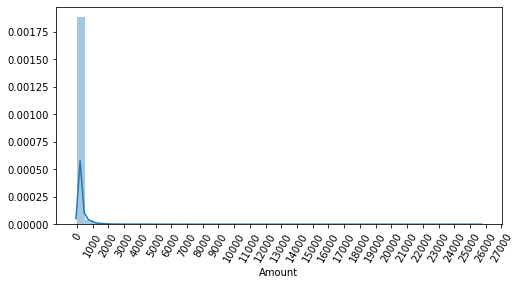

In [10]:
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df["Amount"])

In [11]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy["Amount"].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(["Time", "Amount"], axis=1, inplace=True)
    return df_copy

In [12]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### Logistic predict performance ###")
lr_model = LogisticRegression()
get_model_train_eval(lr_model, X_train, X_test, y_train, y_test)

print("### LightGBM predict performance ###")
lgbm_model = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_model, X_train, X_test, y_train, y_test)

### Logistic predict performance ###
[[85284    12]
 [   56    91]]
accuracy(정확도): 0.999204147794436, precision(정밀도): 0.883495145631068
 recall(재현율): 0.6190476190476191, f1 score: 0.728, roc_auc value: 0.9689625052797334


### LightGBM predict performance ###
[[85288     8]
 [   27   120]]
accuracy(정확도): 0.9995903701883126, precision(정밀도): 0.9375
 recall(재현율): 0.8163265306122449, f1 score: 0.8727272727272728, roc_auc value: 0.9805036674208232




In [13]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy["Amount"])
    df_copy.insert(0, "Amount_Scaled", amount_n)
    df_copy.drop(["Time", "Amount"], axis=1, inplace=True)
    return df_copy

In [14]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### Logistic predict performance ###")
lr_model = LogisticRegression()
get_model_train_eval(lr_model, X_train, X_test, y_train, y_test)

print("### LightGBM predict performance ###")
lgbm_model = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_model, X_train, X_test, y_train, y_test)

### Logistic predict performance ###
[[85286    10]
 [   54    93]]
accuracy(정확도): 0.9992509626300574, precision(정밀도): 0.9029126213592233
 recall(재현율): 0.6326530612244898, f1 score: 0.7440000000000001, roc_auc value: 0.9699757036560638


### LightGBM predict performance ###
[[85288     8]
 [   30   117]]
accuracy(정확도): 0.9995552590615966, precision(정밀도): 0.936
 recall(재현율): 0.7959183673469388, f1 score: 0.8602941176470588, roc_auc value: 0.9790579615826822




### 이상치 데이터 제거 후 모델 학습/예측/평가

<AxesSubplot:>

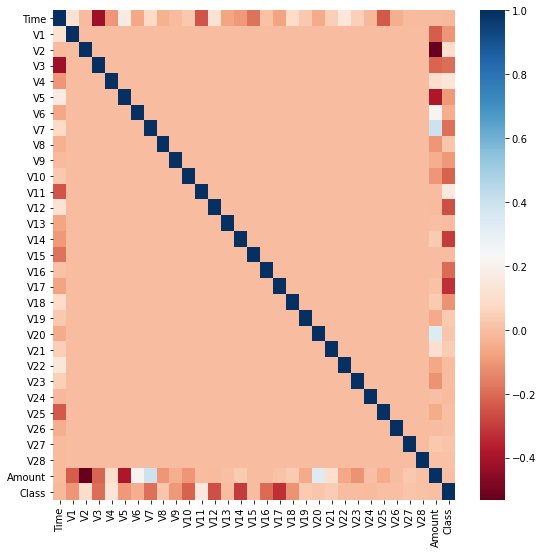

In [15]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap="RdBu")

In [16]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df["Class"] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 - iqr_weight
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [17]:
outlier_index = get_outlier(card_df, column="V14", weight=1.5)
print("이상치 데이터 인덱스", outlier_index)

이상치 데이터 인덱스 Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=433)


In [18]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy["Amount"])
    df_copy.insert(0, "Amount_Scaled", amount_n)
    df_copy.drop(["Time", "Amount"], axis=1, inplace=True)
    outlier_index = get_outlier(df_copy, column="V14", weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [49]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### Logistic predict performance ###")
get_model_train_eval(lr_model, X_train, X_test, y_train, y_test)
print("### LightGBM predict performance ###")
get_model_train_eval(lgbm_model, X_train, X_test, y_train, y_test)

### Logistic predict performance ###
[[85296     1]
 [    0    16]]
accuracy(정확도): 0.9999882784569761, precision(정밀도): 0.9411764705882353
 recall(재현율): 1.0, f1 score: 0.9696969696969697, roc_auc value: 0.9999882762582506


### LightGBM predict performance ###
[[85296     1]
 [    0    16]]
accuracy(정확도): 0.9999882784569761, precision(정밀도): 0.9411764705882353
 recall(재현율): 1.0, f1 score: 0.9696969696969697, roc_auc value: 1.0




In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print("feature/label dataset for train, before apply SMOTE:", X_train.shape, y_train.shape)
print("feature/label dataset for train, after apply SMOTE:", X_train_over.shape, y_train_over.shape)
print("SMOTE 적용 후 레이블 값 분포:\n1:", len(y_train_over[y_train_over == 1]), "\n0:", len(y_train_over[y_train_over == 0]))

feature/label dataset for train, before apply SMOTE: (199061, 29) (199061,)
feature/label dataset for train, after apply SMOTE: (398036, 29) (398036,)
SMOTE 적용 후 레이블 값 분포:
1: 199018 
0: 199018


In [51]:
lr_model = LogisticRegression()
get_model_train_eval(lr_model, X_train_over, X_test, y_train_over, y_test)

[[85294     3]
 [    0    16]]
accuracy(정확도): 0.9999648353709283, precision(정밀도): 0.8421052631578947
 recall(재현율): 1.0, f1 score: 0.9142857142857143, roc_auc value: 0.9999882762582506




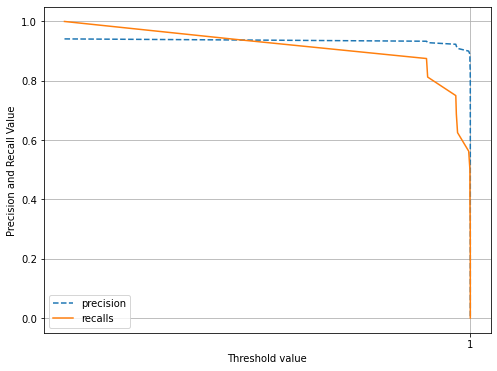

In [52]:
precision_recall_curve_plot(y_test, lr_model.predict_proba(X_test)[:, 1])

In [53]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_model, X_train_over, X_test, y_train_over, y_test)

[[85295     2]
 [    0    16]]
accuracy(정확도): 0.9999765569139522, precision(정밀도): 0.8888888888888888
 recall(재현율): 1.0, f1 score: 0.9411764705882353, roc_auc value: 0.999997801798422


